<a href="https://colab.research.google.com/github/yeonnex/Colab/blob/main/DACON_%EC%9E%AC%EC%A0%95%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 코랩에 한글 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

plt.rc('font', family=font_name)

fm._rebuild()

In [ ]:
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/dataset/재정데이터시각화/2019_기능별단체별세출결산.xlsx")

In [ ]:
df.info() # null값 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8562 entries, 0 to 8561
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회계연도    8562 non-null   int64 
 1   지역명     8562 non-null   object
 2   자치단체코드  8562 non-null   int64 
 3   자치단체명   8562 non-null   object
 4   분야코드    8562 non-null   int64 
 5   분야명     8562 non-null   object
 6   부문코드    8562 non-null   int64 
 7   부문명     8562 non-null   object
 8   세출결산액   8562 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 602.1+ KB


1.횟수바탕

In [ ]:
# 등록된 횟수 바탕(금액X)으로 지역별 집계(내역이 많은 지역/내역이 적은 지역)
area_count = df['지역명'].value_counts() 
area_count

경기    1159
경북     870
전남     829
서울     781
강원     711
경남     702
충남     593
전북     544
부산     524
충북     435
인천     402
대구     297
울산     215
대전     209
광주     205
제주      44
세종      42
Name: 지역명, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

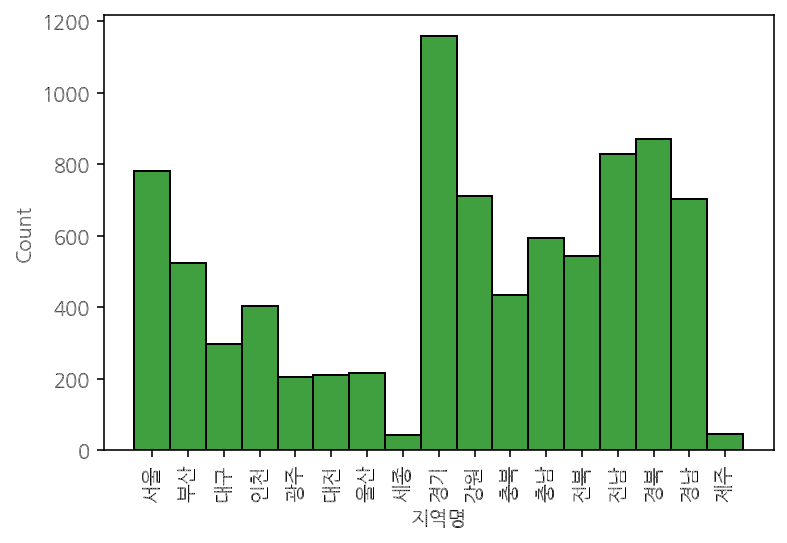

In [ ]:
# 시각화
sns.histplot(data=df, x=df['지역명'],  bins=50, color='green')
plt.xticks(rotation=90)

In [ ]:
# 등록된 횟수 바탕(금액X)으로 분야별 집계
field_count = df['분야명'].value_counts()
field_count
#field_count.index

사회복지       1623
문화및관광      1026
환경보호       1015
일반공공행정      790
산업ㆍ중소기업     679
농림해양수산      584
국토및지역개발     555
수송및교통       538
보건          476
교육          445
공공질서및안전     311
기타          243
예비비         243
과학기술         34
Name: 분야명, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

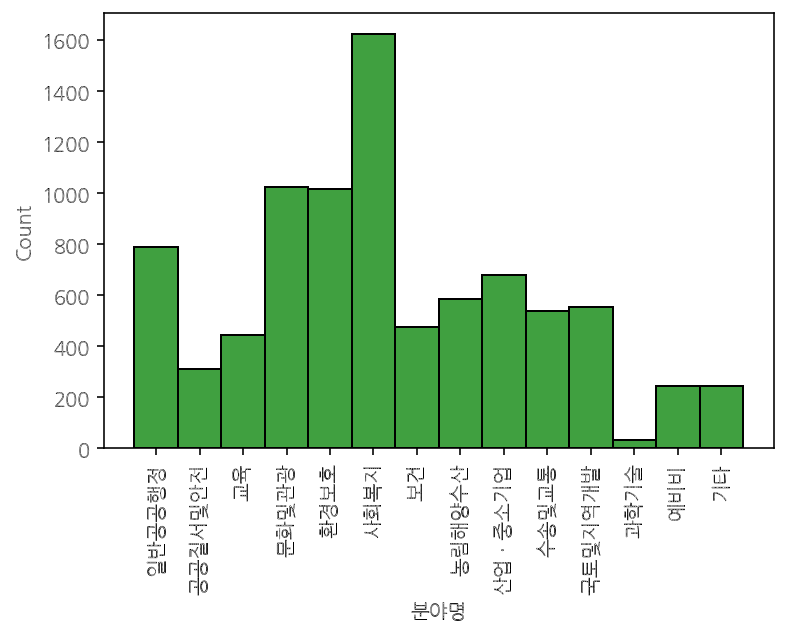

In [ ]:
# 시각화
sns.histplot(data=df, x=df['분야명'],  bins=50, color='green')
plt.xticks(rotation=90)

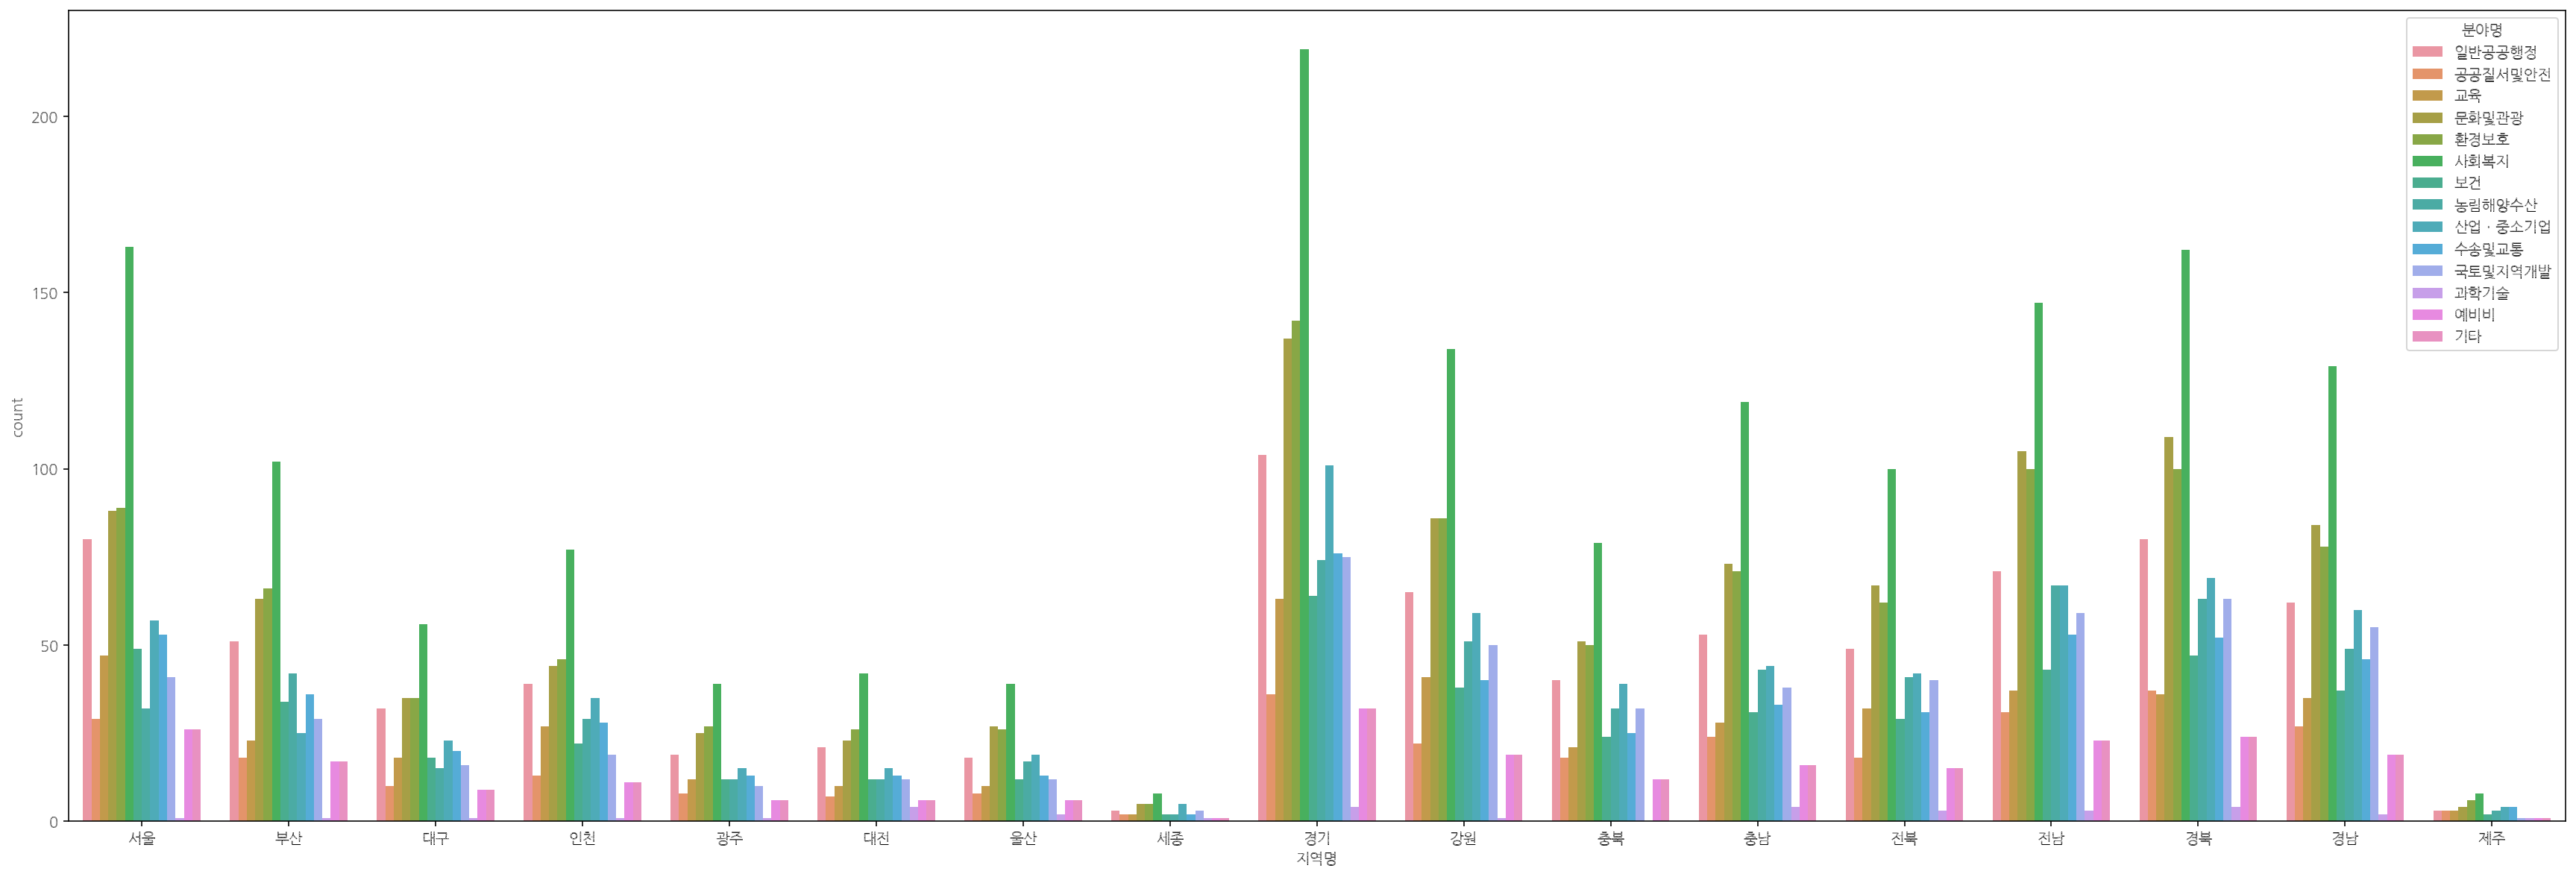

In [ ]:
# 등록된 횟수 바탕(금액X)으로 지역 + 분야 엮어서 시각화
plt.figure(figsize=(30, 10))
fig = sns.countplot(data=df, x=df['지역명'], hue=df['분야명'])

2. 금액바탕

2-1 지역

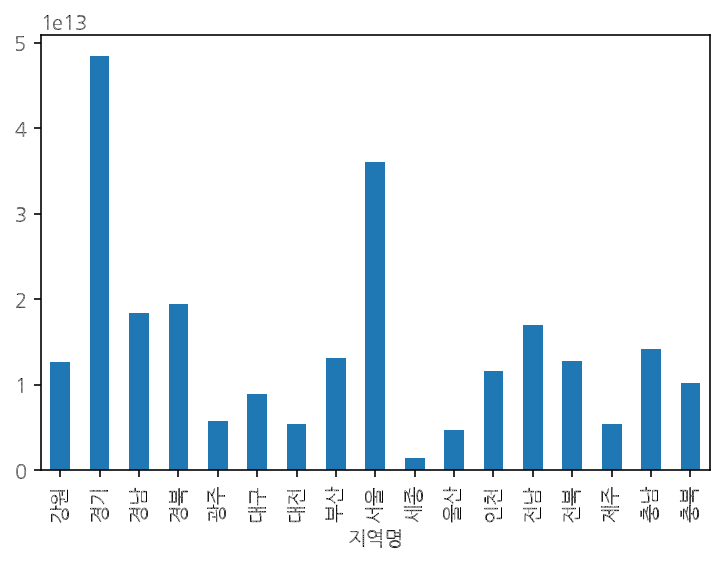

In [ ]:
# 결산액 바탕으로 지역별 집계 (돈 많이 쓴 지역/돈 적게 쓴 지역)
세출결산액_sum = df.groupby("지역명").세출결산액.sum()
세출결산액_sum.plot.bar()
plt.show()

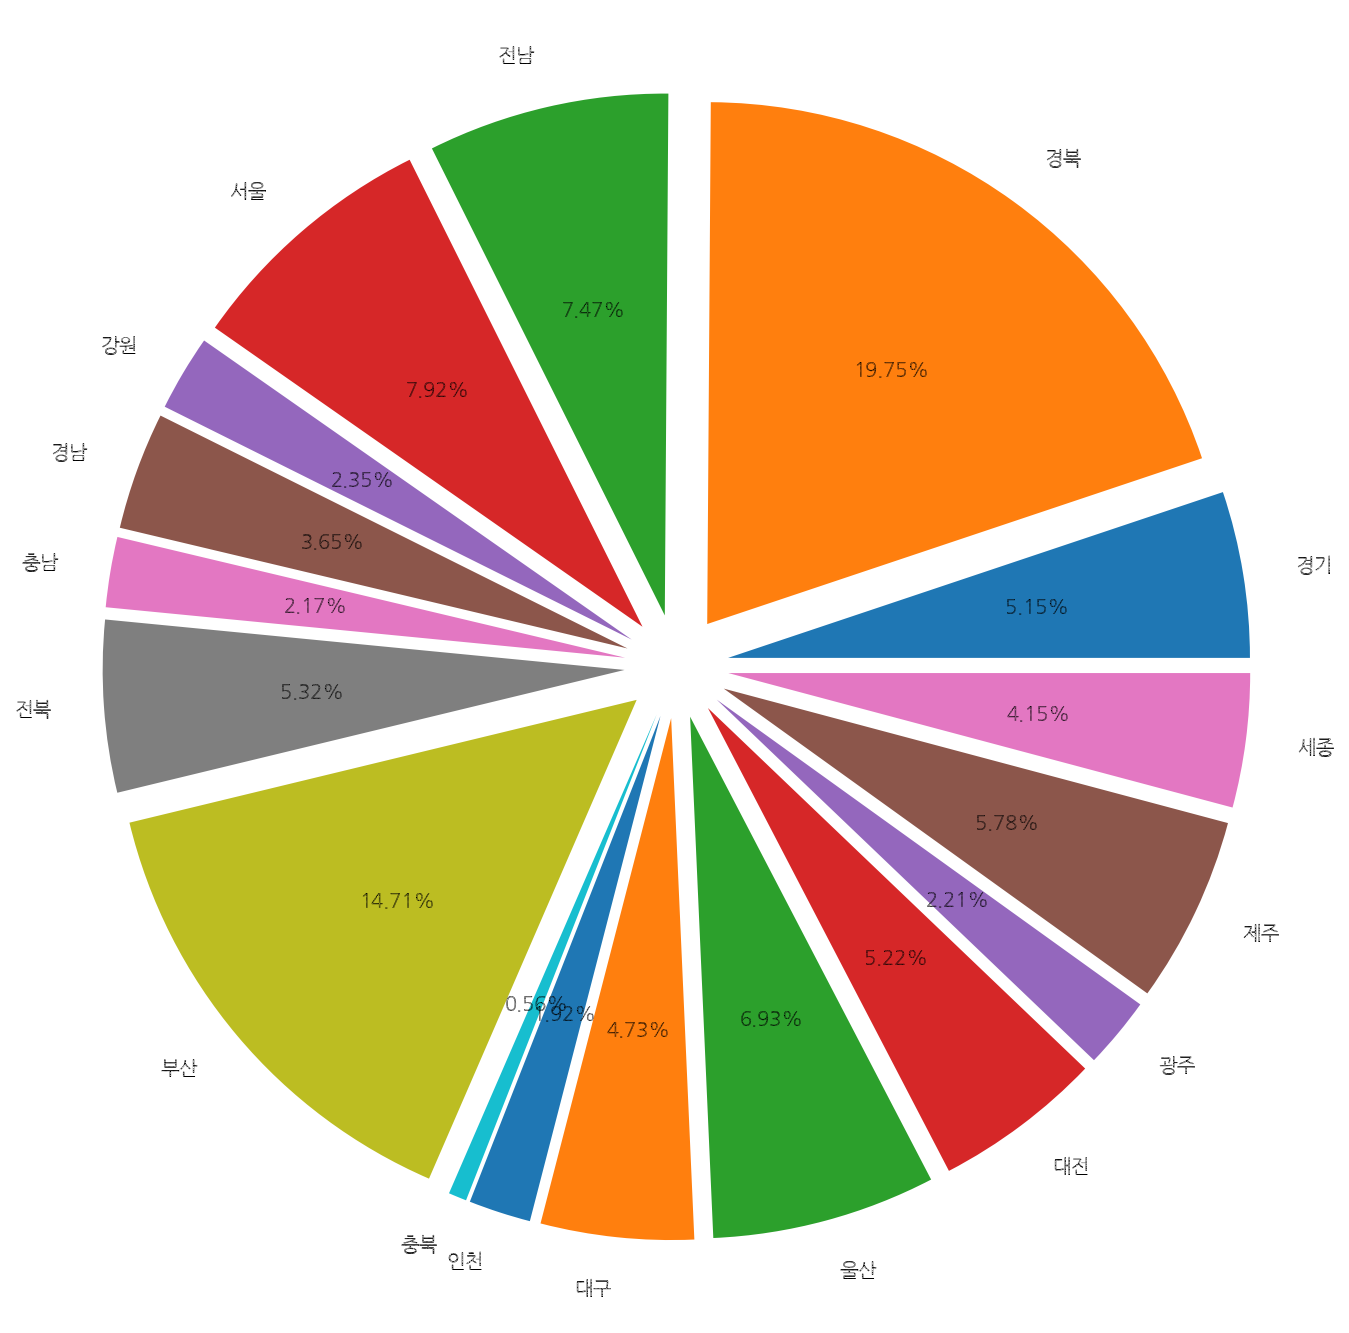

In [ ]:
# 파이차트로 그리기
ratio = 세출결산액_sum.to_list()
labels = area_count.index
explode = [0.1]*17
#plt.pie(ratio, labels=labels, autopct='%.1f%%')
#plt.show()

fig = plt.figure(figsize=(12,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 하얀색
 
ax = fig.add_subplot() ## 프래임 생성
 
ax.pie(x=ratio,labels=labels,autopct=lambda p : '{:.2f}%'.format(p), explode=explode ) ## 파이 차트 출력
plt.show()

In [ ]:
# 세금 많이 쓴 지역 top3
df.groupby("지역명").세출결산액.sum().sort_values(ascending=False)[:3]

지역명
경기    48438596173184
서울    36076761592035
경북    19437538275289
Name: 세출결산액, dtype: int64

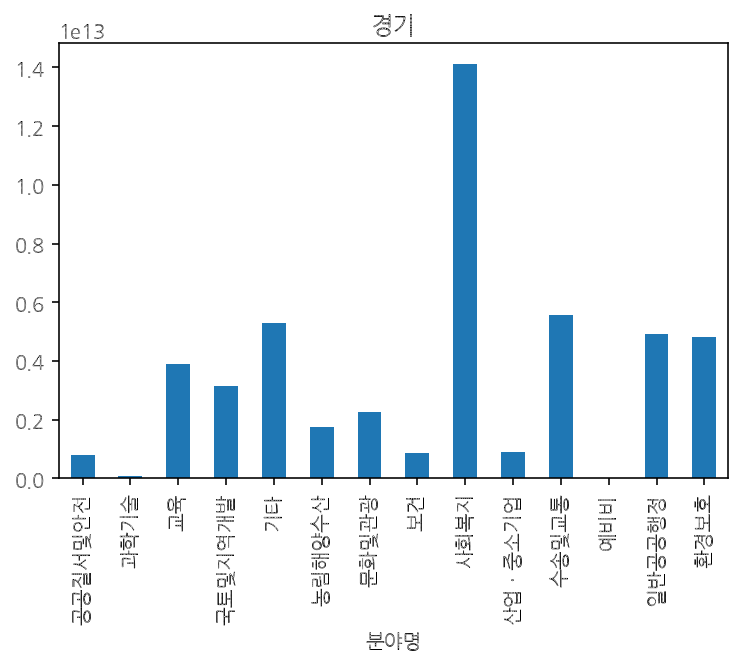

In [ ]:
# 돈 제일 많이 쓴 경기 자세히보자. 주로 어디에 돈썻나 ?
area_경기 = df[df['지역명']=="경기"]
area_경기_sum = area_경기.groupby("분야명").세출결산액.sum()
area_경기_sum.plot.bar()
plt.title("경기")
plt.show()

In [ ]:
#지역별로 돈 제일 많이 쓰는 분야에 차이가 있을까 ?
for area_name in area_count.index:
  a = df[df['지역명'] == area_name]
  a_sum = a.groupby("분야명").세출결산액.sum()
  print("==============={}=================".format(area_name))
  print(a_sum.sort_values(ascending=False)[0:5]) # 돈많이쓰는분야 5등까지 보자.

# 제주도 - 환경보호에 제일 많이 씀 !
# 광주 - 문화및관광에 많이 씀 

===============경기=================
분야명
사회복지      14109600525146
수송및교통      5554002817597
기타         5283043897026
일반공공행정     4928499122346
환경보호       4832392830964
Name: 세출결산액, dtype: int64
===============경북=================
분야명
사회복지       4353720221398
농림해양수산     2526292177312
기타         2522233898807
환경보호       1898638004528
국토및지역개발    1840679506610
Name: 세출결산액, dtype: int64
===============전남=================
분야명
사회복지       3545399102757
농림해양수산     2817481069070
기타         2493311322277
국토및지역개발    1613781582099
일반공공행정     1387388951373
Name: 세출결산액, dtype: int64
===============서울=================
분야명
사회복지     12850142620678
기타        4850053810680
교육        4036192244472
수송및교통     3766527954213
환경보호      3049725398902
Name: 세출결산액, dtype: int64
===============강원=================
분야명
사회복지       2827549949685
기타         1751074123745
농림해양수산     1312275381459
환경보호       1278608519663
국토및지역개발    1113724314617
Name: 세출결산액, dtype: int64
===============경남=================
분야명
사회복지       47138

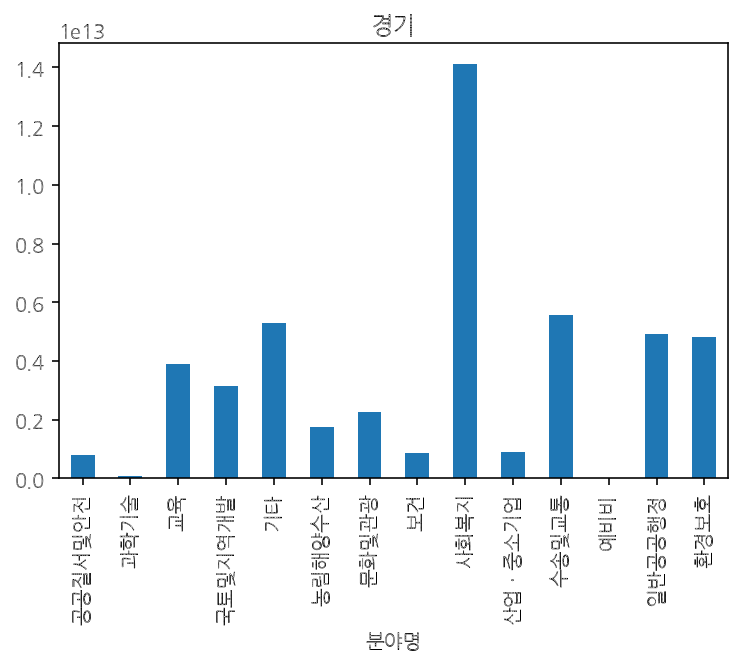

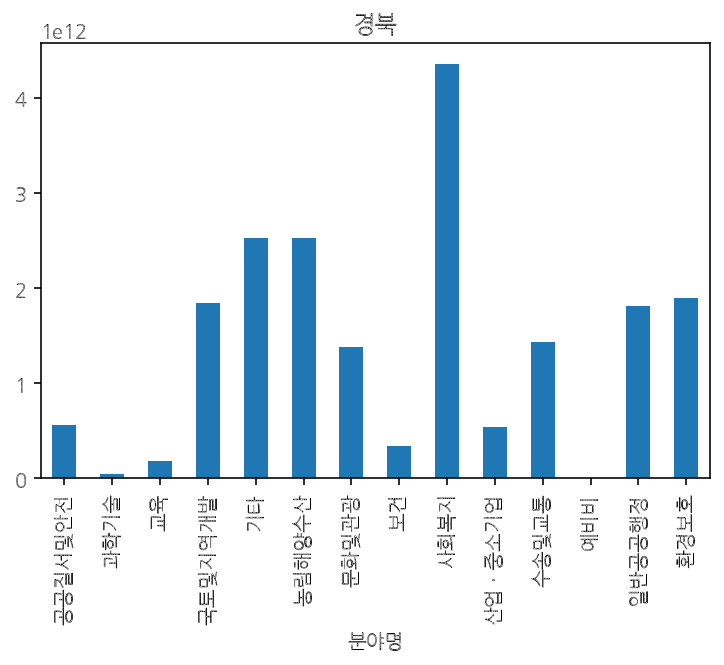

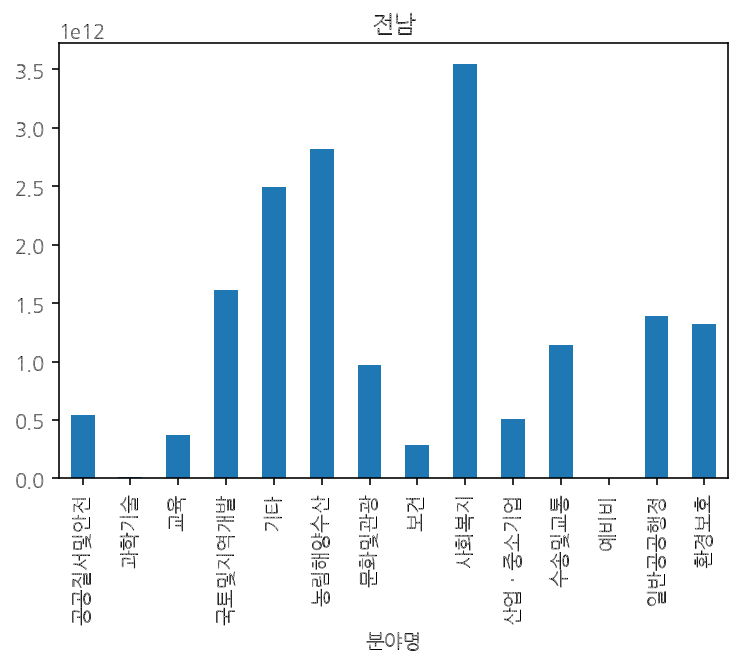

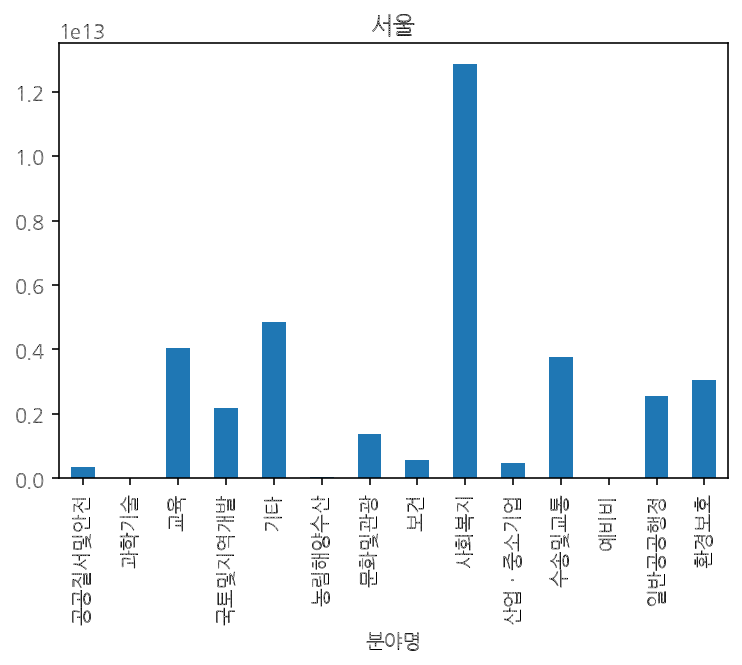

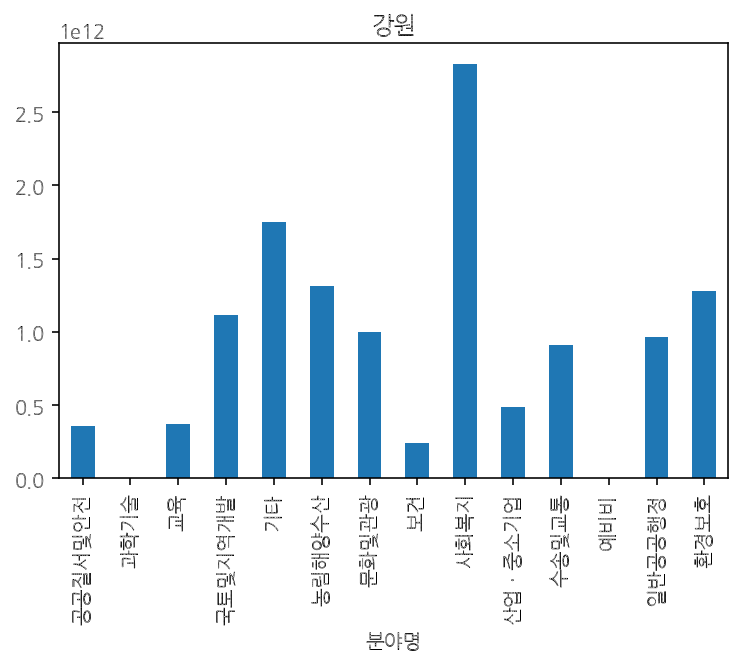

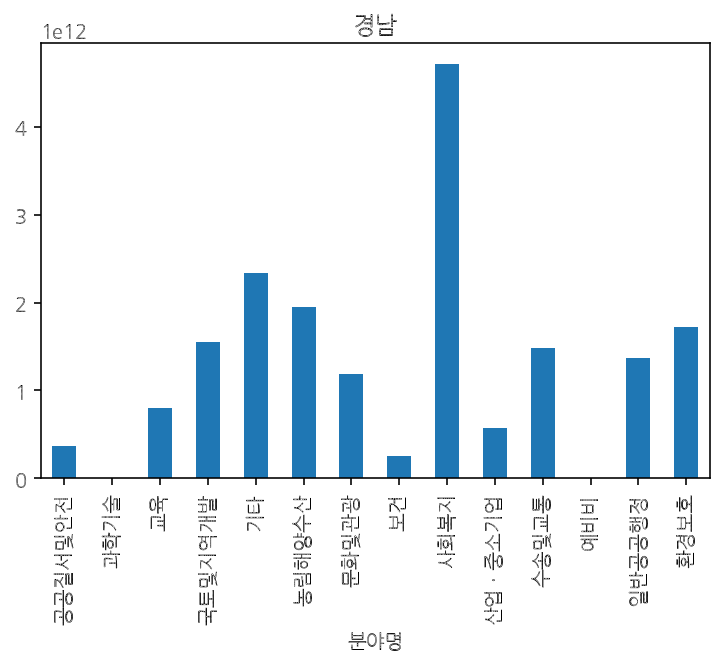

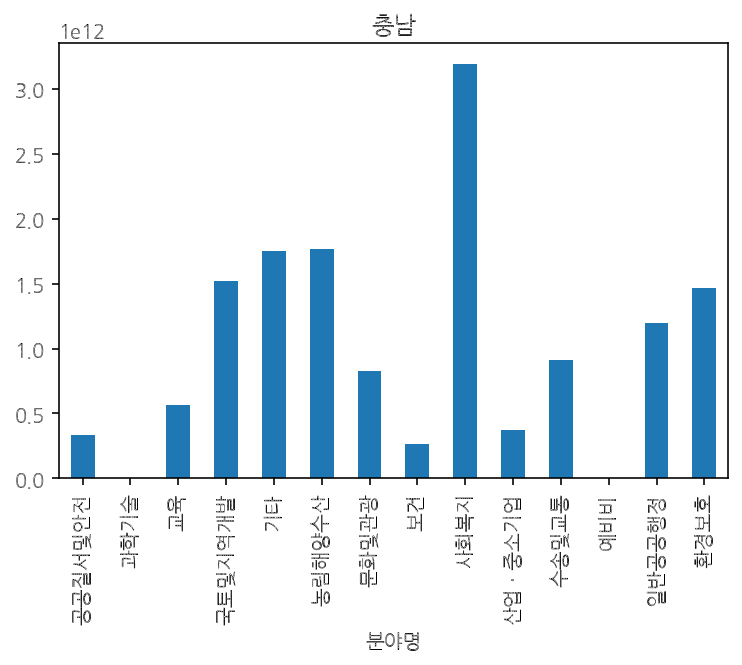

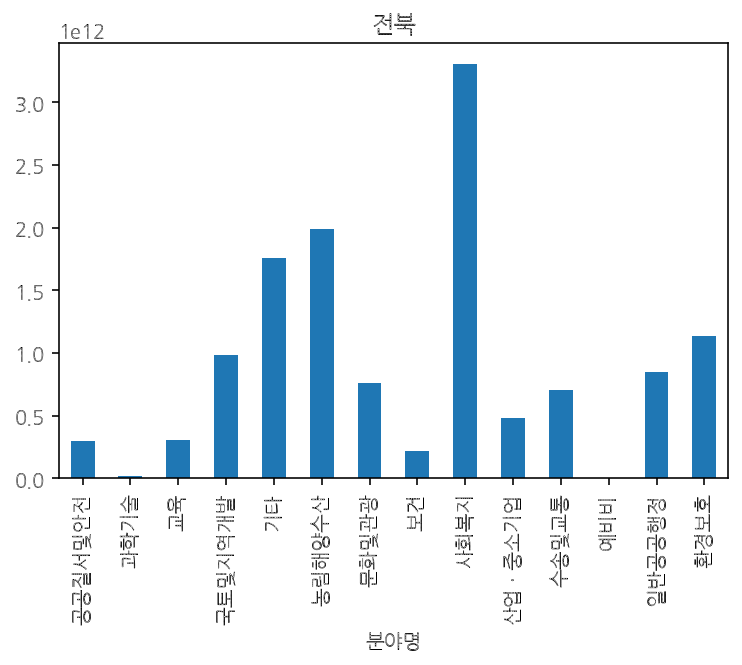

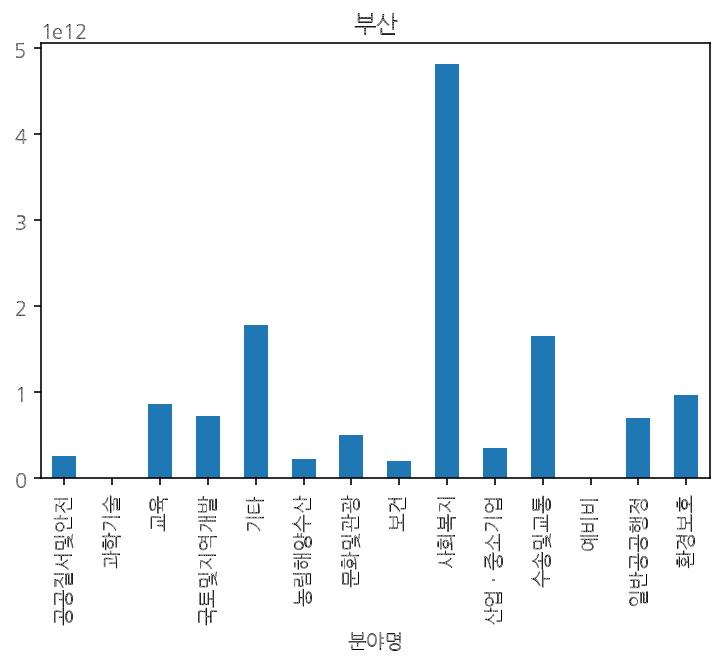

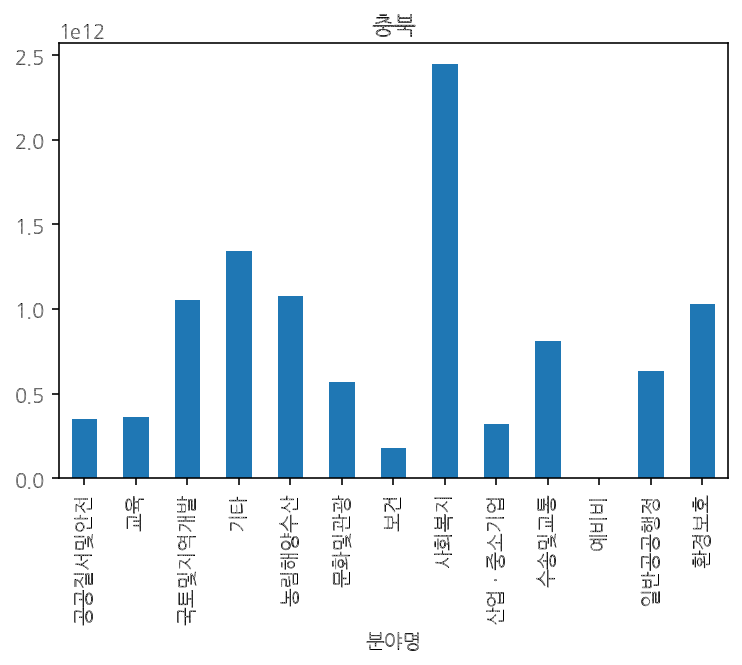

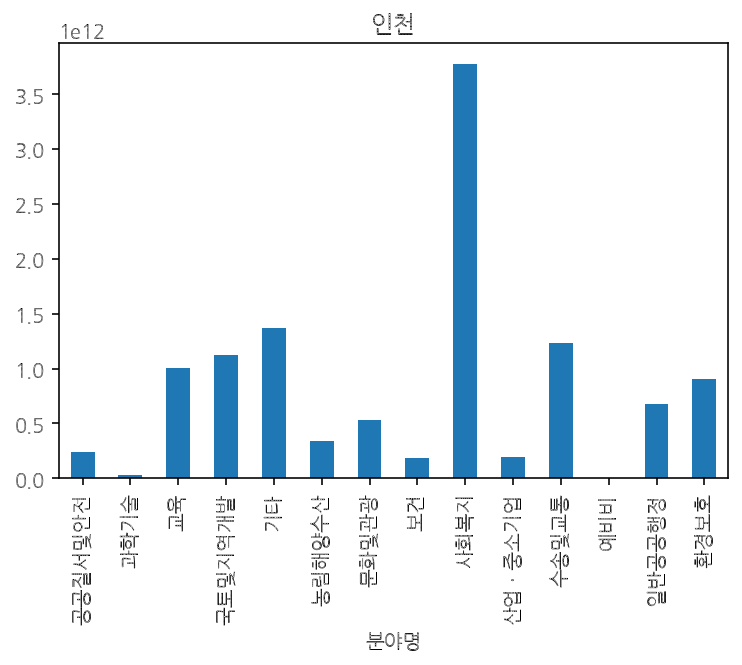

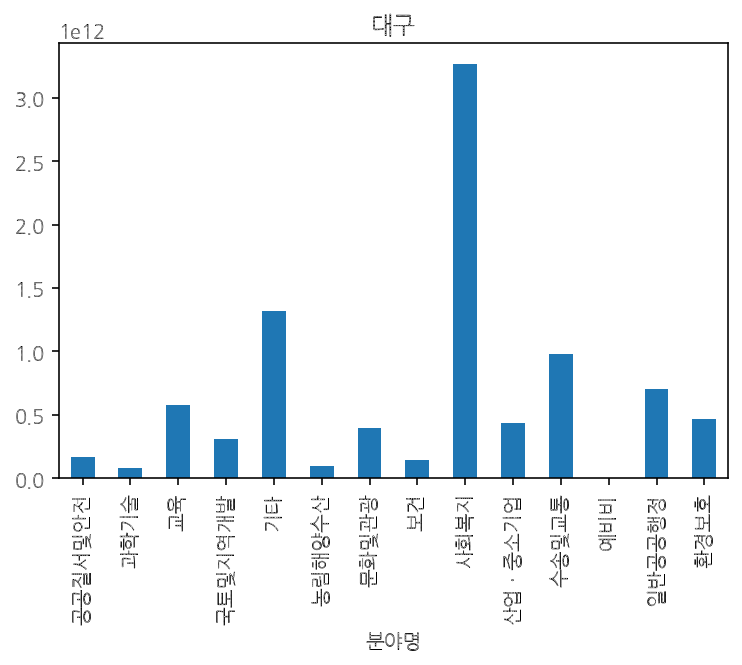

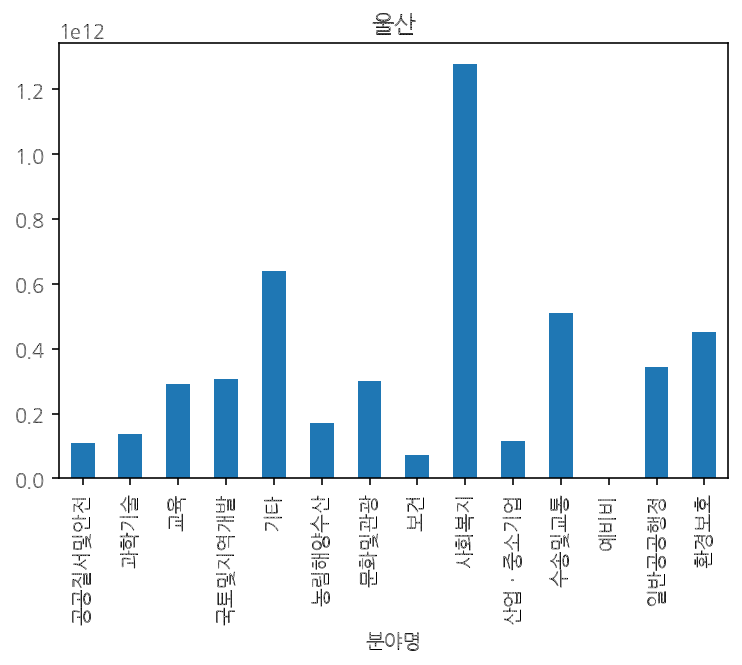

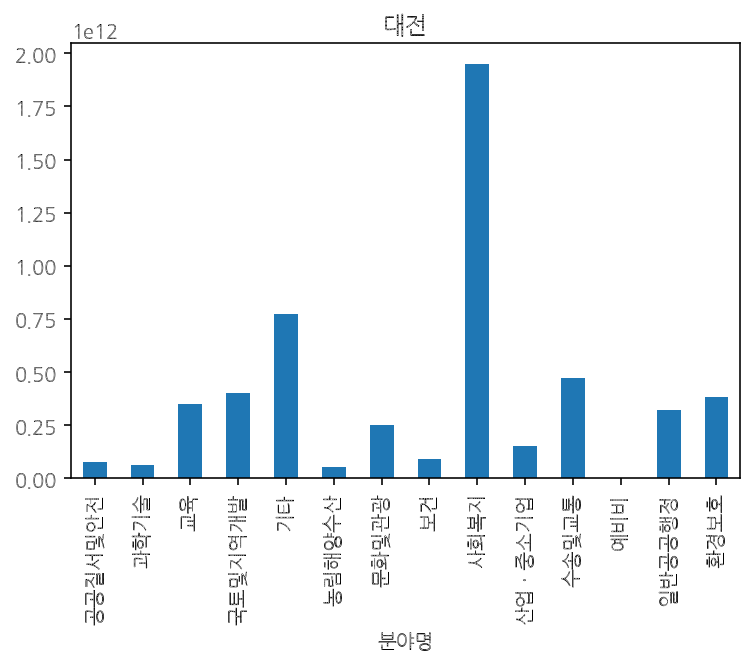

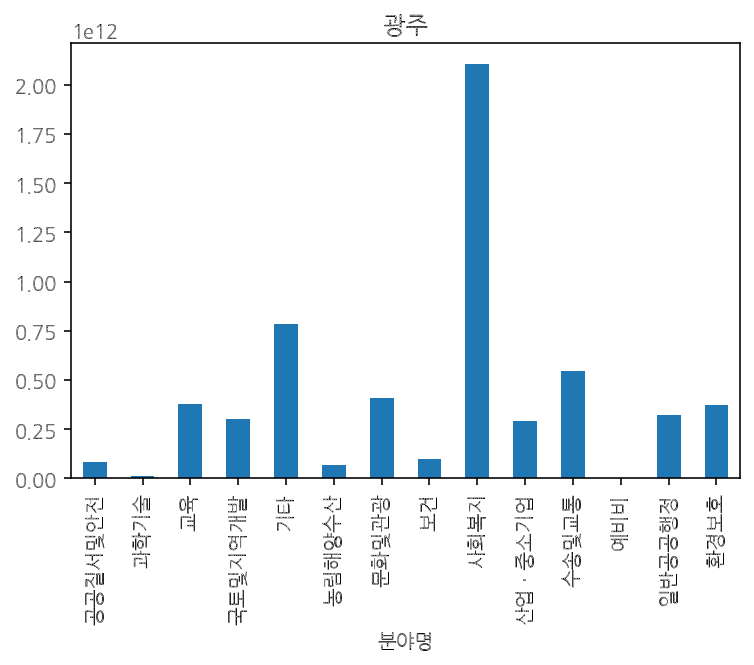

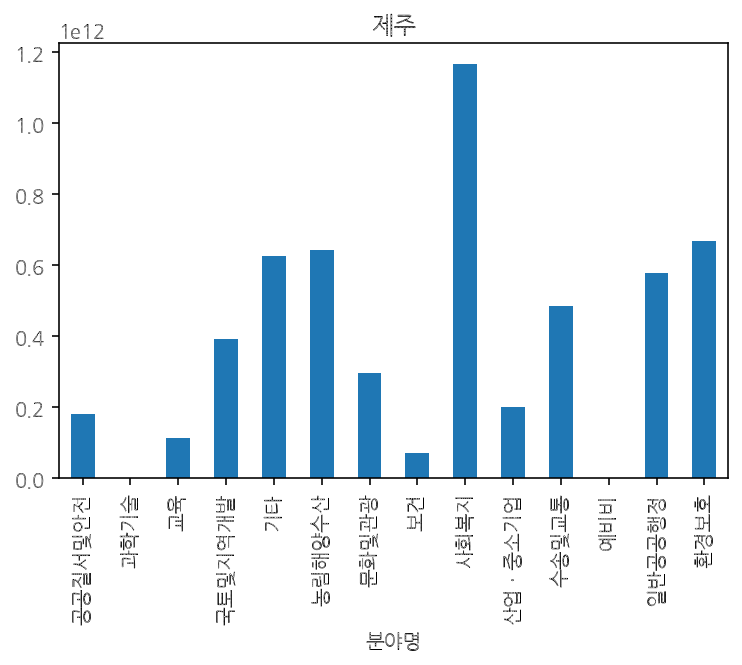

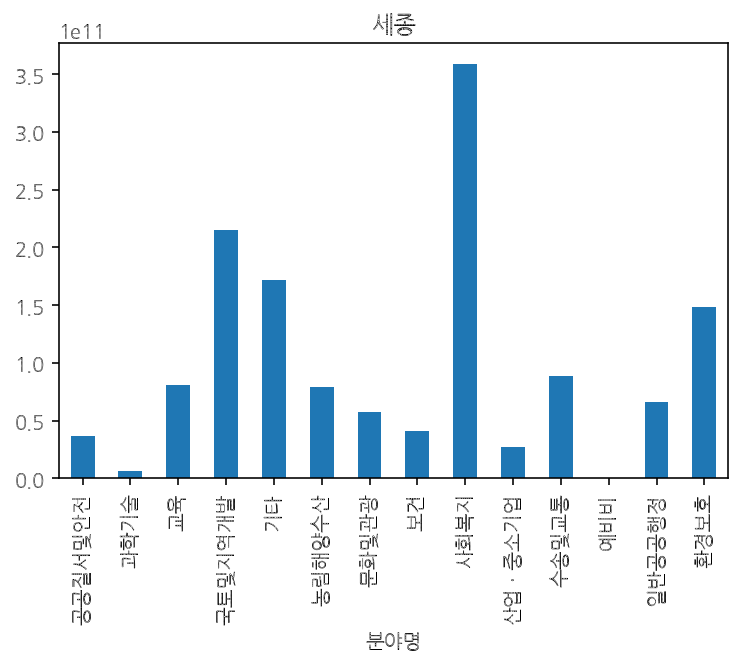

<Figure size 432x288 with 0 Axes>

In [ ]:
#시각화 - 지역별로 돈 제일 많이 쓰는 분야에 차이가 있을까 ?
for area_name in area_count.index:
  a = df[df['지역명'] == area_name]
  a_sum = a.groupby("분야명").세출결산액.sum()
  plt.title(area_name)
  a_sum.plot.bar()
  plt.figure()

2-2 분야

In [ ]:
# 각 분야별 부문명 (지역고려 X)(분야별로 조금 더 깊게 보자)
for field in field_count.index:
  a = df[df['분야명']==field]
  print("==================={}==================".format(field))
  print(a['부문명'].value_counts())

===================사회복지==================
기초생활보장      241
노인ㆍ청소년      241
보육ㆍ가족및여성    241
취약계층지원      239
노동          217
보훈          200
사회복지일반      172
주택           72
Name: 부문명, dtype: int64
===================문화및관광==================
체육         243
문화예술       242
문화재        218
관광         213
문화및관광일반    110
Name: 부문명, dtype: int64
===================환경보호==================
폐기물        241
상하수도ㆍ수질    229
환경보호일반     189
대기         166
자연         165
해양          25
Name: 부문명, dtype: int64
===================일반공공행정==================
일반행정         243
입법및선거관리      240
지방행정ㆍ재정지원    226
재정ㆍ금융         81
Name: 부문명, dtype: int64
===================산업ㆍ중소기업==================
산업진흥ㆍ고도화     204
에너지및자원개발     193
산업ㆍ중소기업일반    139
산업금융지원        63
무역및투자유치       57
산업기술지원        23
Name: 부문명, dtype: int64
===================농림해양수산==================
농업ㆍ농촌      235
임업ㆍ산촌      224
해양수산ㆍ어촌    125
Name: 부문명, dtype: int64
===================국토및지역개발==================
지역및도시    243
수자원      185
산업단지     127
Name

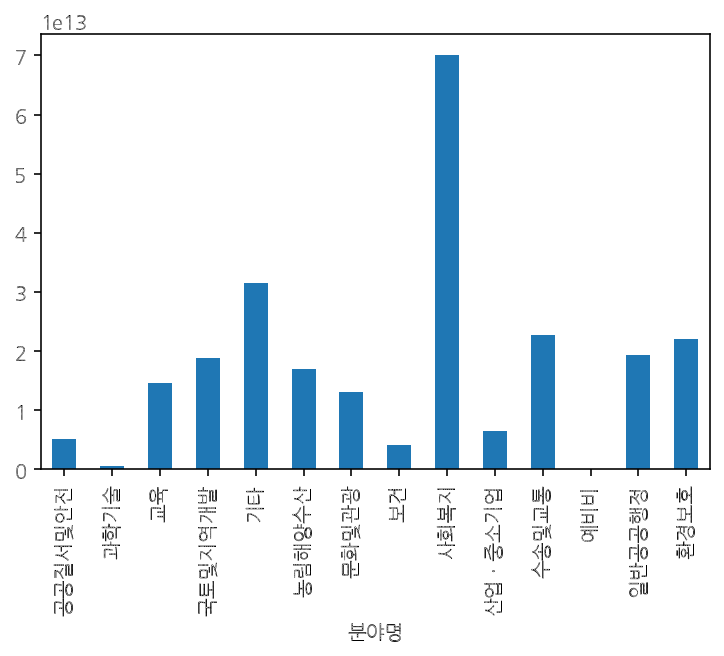

In [ ]:
# 결산액 바탕으로 분야별 집계
세출결산액_sum = df.groupby("분야명").세출결산액.sum()
세출결산액_sum.plot.bar()
plt.show()

In [ ]:
# 세금 많이 쓴 분야 top3
df.groupby("분야명").세출결산액.sum().sort_values(ascending=False)[:3]

분야명
사회복지     70048139744828
기타       31557914849983
수송및교통    22690248440514
Name: 세출결산액, dtype: int64

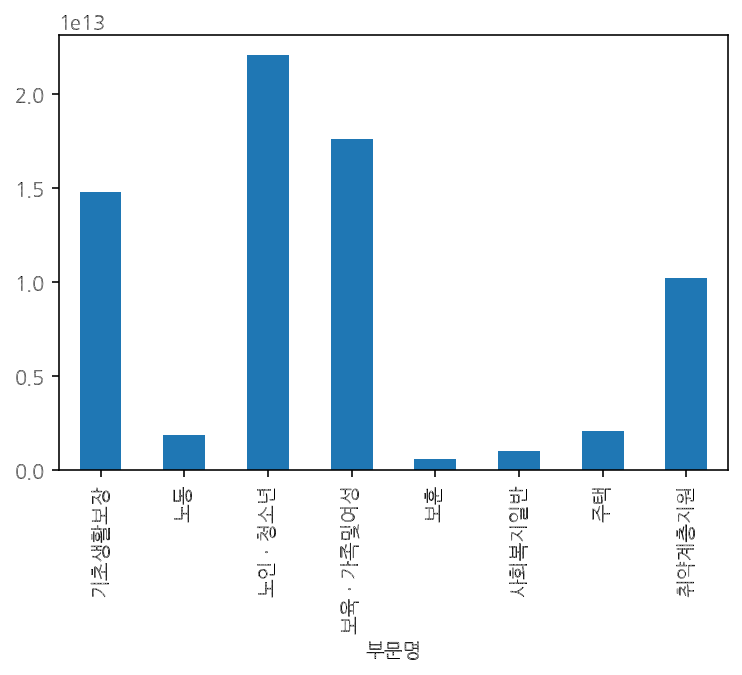

In [ ]:
# 돈 제일 많이 쓴 사회복지 자세히보자. 주로 어디에 돈썻나 ?
field_사회복지 = df[df['분야명']=="사회복지"]
field_사회복지_sum = field_사회복지.groupby("부문명").세출결산액.sum()
field_사회복지_sum.plot.bar()
plt.show()

In [ ]:
# 각 분야별로 뭐하는데 돈을 주로 썻나.
for field_name in field_count.index:
  a = df[df['분야명'] == field_name]
  a_sum = a.groupby("부문명").세출결산액.sum()
  print("==============={}=================".format(field_name))
  print(a_sum.sort_values(ascending=False)[:3])

===============사회복지=================
부문명
노인ㆍ청소년      22043205384264
보육ㆍ가족및여성    17590634982025
기초생활보장      14782680602829
Name: 세출결산액, dtype: int64
===============문화및관광=================
부문명
체육      4611200189381
문화예술    4142217327760
관광      2310565434283
Name: 세출결산액, dtype: int64
===============환경보호=================
부문명
상하수도ㆍ수질    14029949140275
폐기물         5257591442308
대기          1386925625558
Name: 세출결산액, dtype: int64
===============일반공공행정=================
부문명
일반행정         12474234015710
지방행정ㆍ재정지원     3627936962864
재정ㆍ금융         2913870554841
Name: 세출결산액, dtype: int64
===============산업ㆍ중소기업=================
부문명
산업진흥ㆍ고도화     3373505528104
산업ㆍ중소기업일반    1253318446492
에너지및자원개발      760111794869
Name: 세출결산액, dtype: int64
===============농림해양수산=================
부문명
농업ㆍ농촌      12479053224910
임업ㆍ산촌       2733196749678
해양수산ㆍ어촌     1700687380463
Name: 세출결산액, dtype: int64
===============국토및지역개발=================
부문명
지역및도시    14836570588242
수자원       2788462873547
산업단지      1153695352461
Name: 

2-3 지역 + 분야 + 부문

In [ ]:
# 지역별로 돈 제일 많이 쓰는 분야 부문별로 봐도 괜찮을듯

for area_name in area_count.index:
  a = df[df['지역명'] == area_name]
  a_sum = a.groupby("분야명").세출결산액.sum()
  field_top = a_sum.sort_values(ascending=False)[0:5].index[1] # 원하는 등수 지정해서 보기
  b = a[a['분야명'] == field_top]
  b_sum = b.groupby("부문명").세출결산액.sum()
  print("==============={}-{}=================".format(area_name, field_top))
  print(b_sum.sort_values(ascending=False)[:4])

===============경기-수송및교통=================
부문명
도로            2728078586843
대중교통ㆍ물류등기타    2141739909785
도시철도           675769259049
해운ㆍ항만            8319000020
Name: 세출결산액, dtype: int64
===============경북-농림해양수산=================
부문명
농업ㆍ농촌      1978419473021
임업ㆍ산촌       396798393194
해양수산ㆍ어촌     151074311097
Name: 세출결산액, dtype: int64
===============전남-농림해양수산=================
부문명
농업ㆍ농촌      2023420133097
해양수산ㆍ어촌     455783545385
임업ㆍ산촌       338277390588
Name: 세출결산액, dtype: int64
===============서울-기타=================
부문명
기타    4850053810680
Name: 세출결산액, dtype: int64
===============강원-기타=================
부문명
기타    1751074123745
Name: 세출결산액, dtype: int64
===============경남-기타=================
부문명
기타    2336102161277
Name: 세출결산액, dtype: int64
===============충남-농림해양수산=================
부문명
농업ㆍ농촌      1376574775492
임업ㆍ산촌       215185985662
해양수산ㆍ어촌     177357286993
Name: 세출결산액, dtype: int64
===============전북-농림해양수산=================
부문명
농업ㆍ농촌      1661108186608
임업ㆍ산촌       234475726722
해양수산ㆍ어촌      944

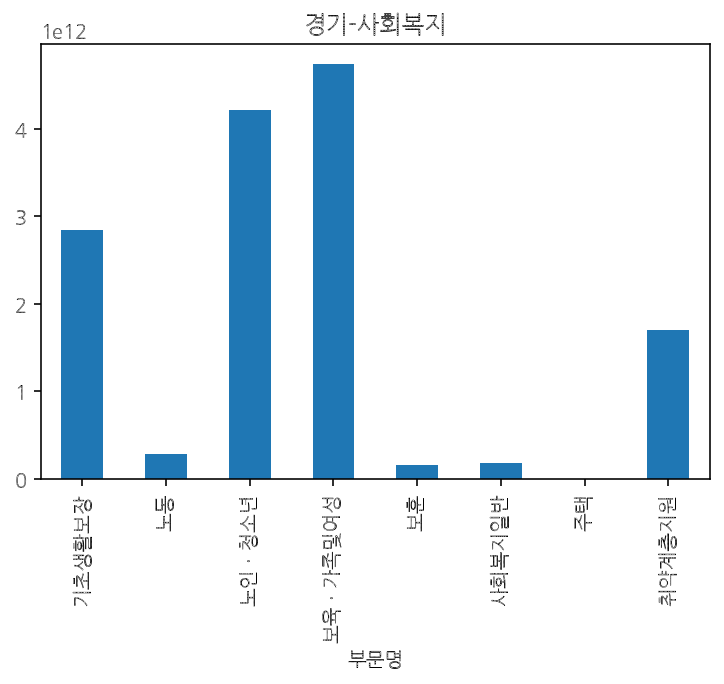

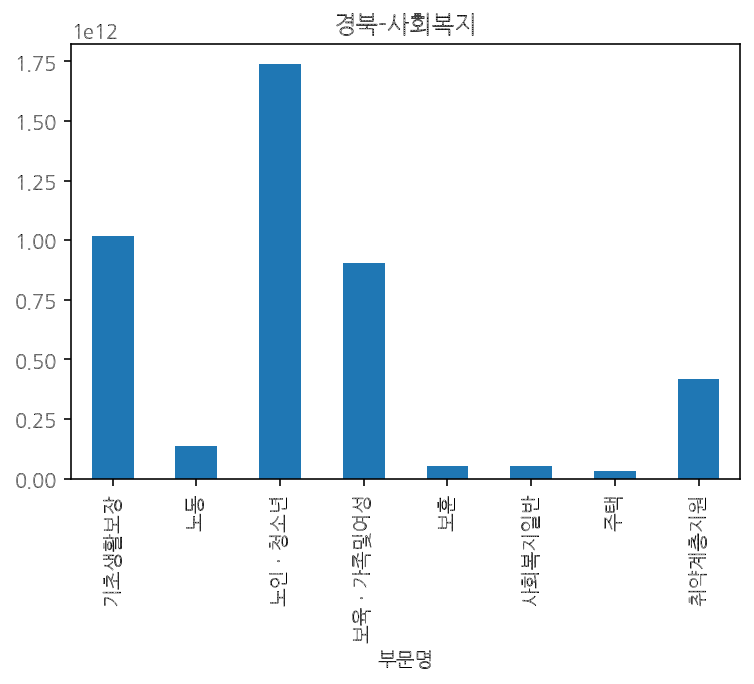

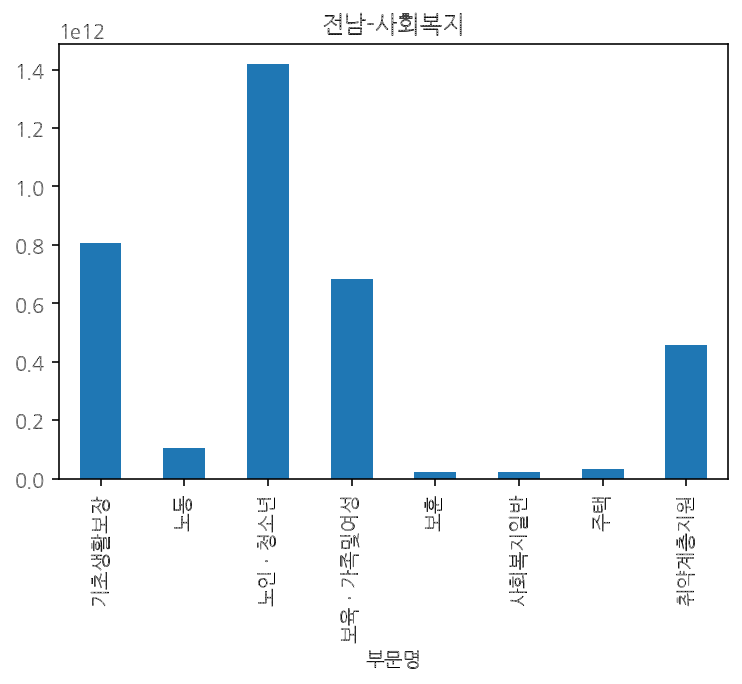

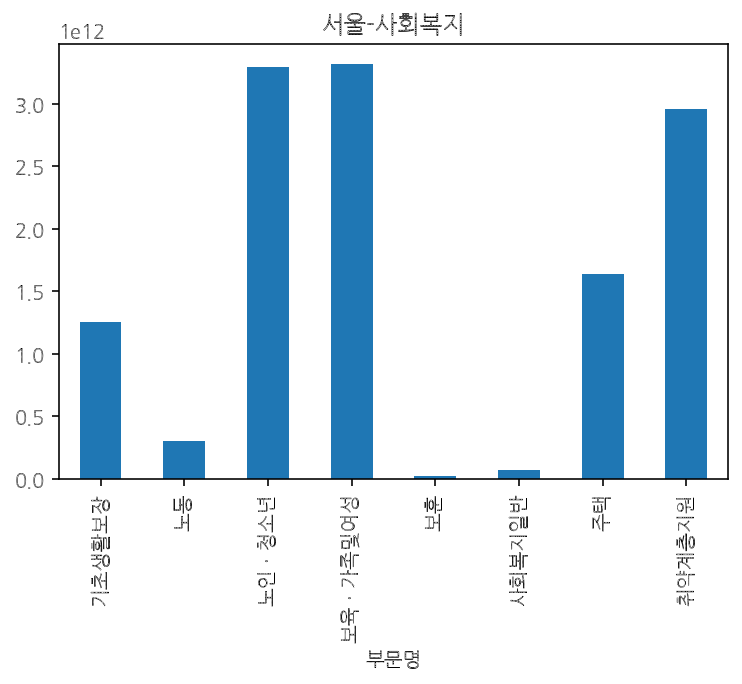

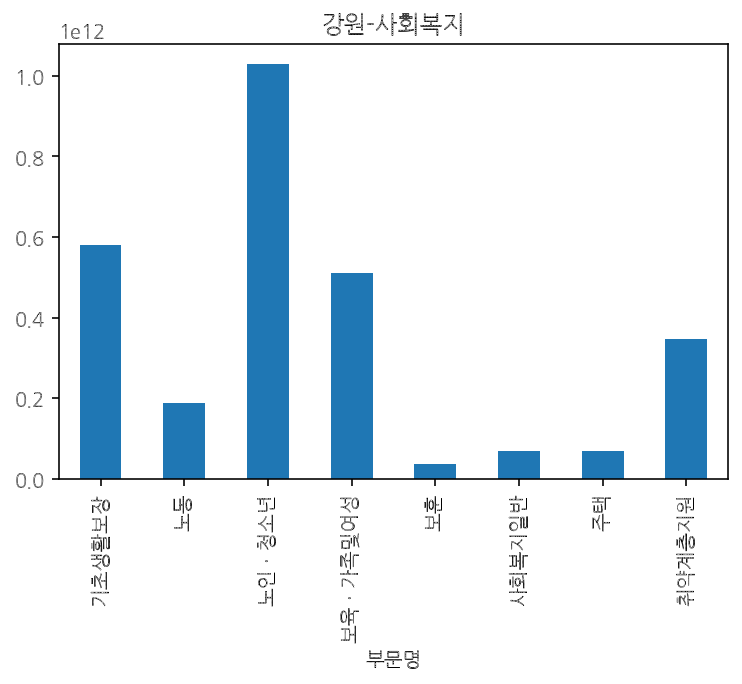

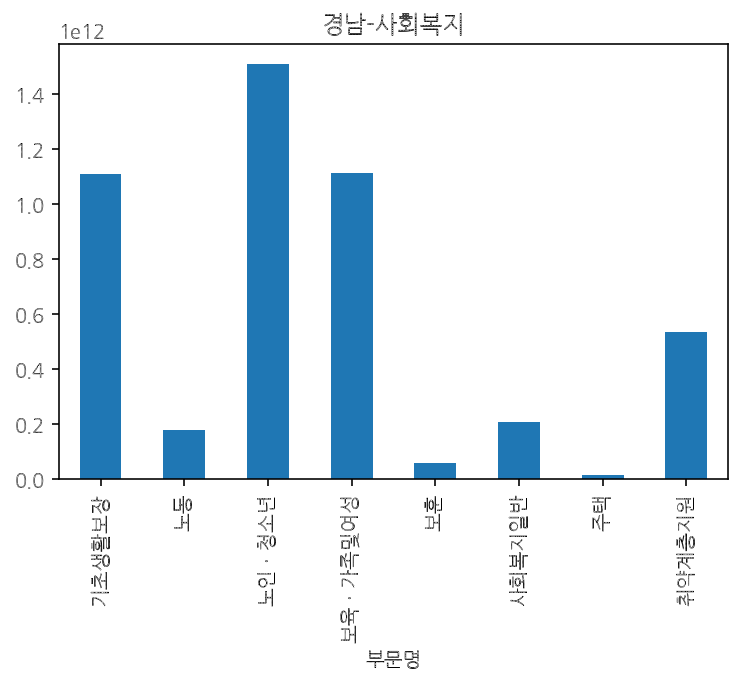

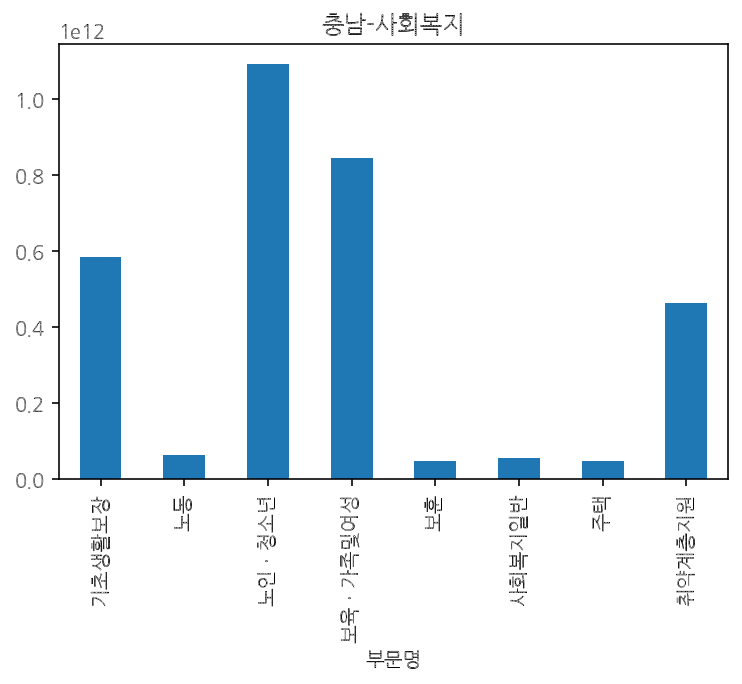

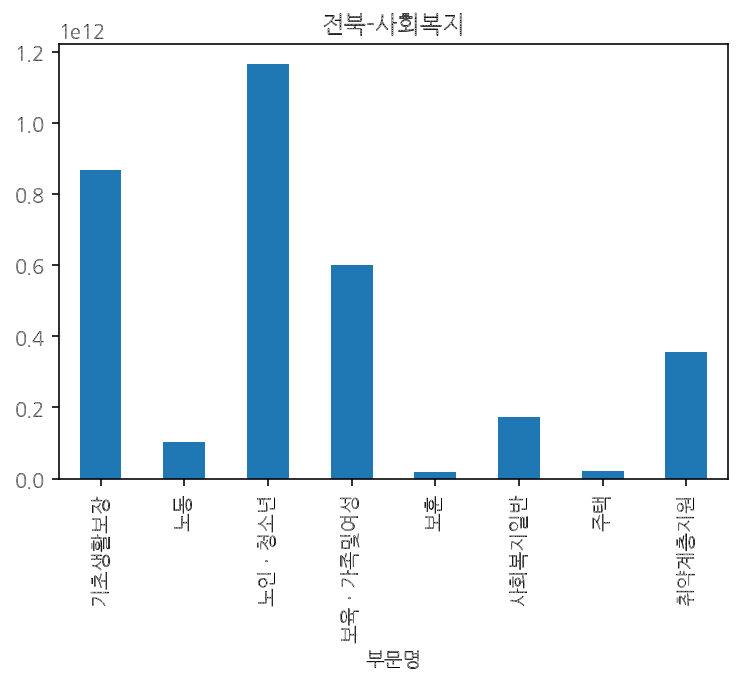

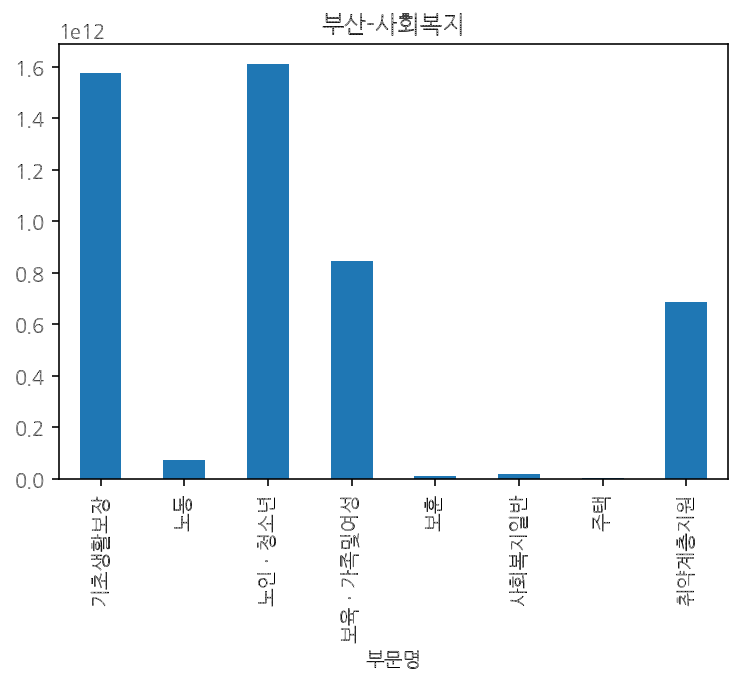

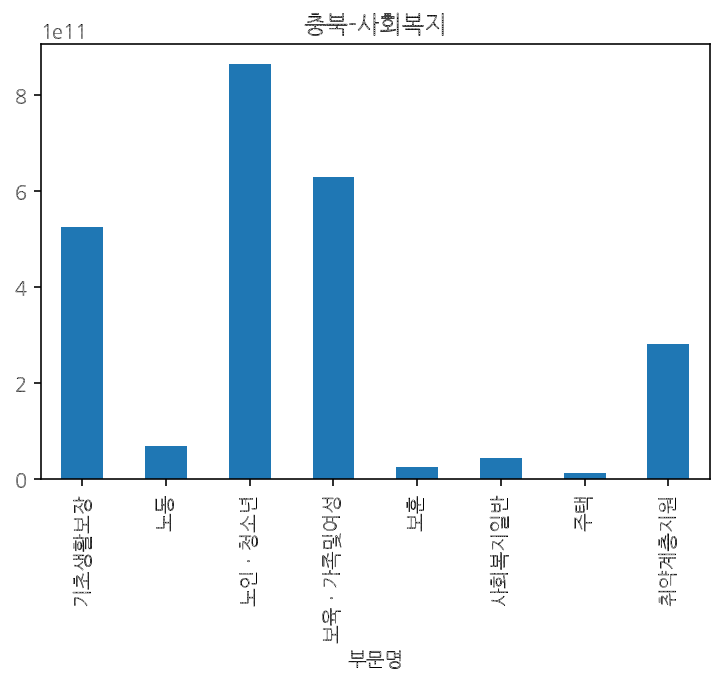

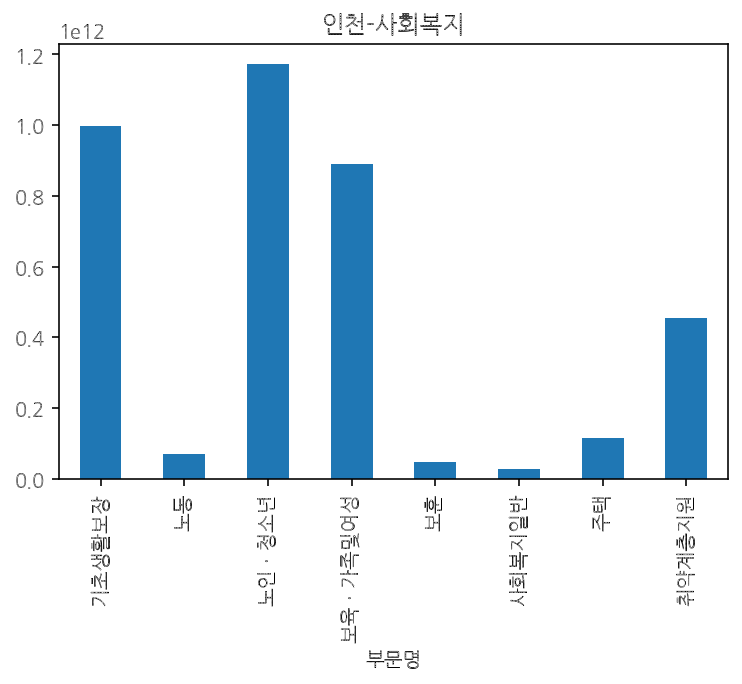

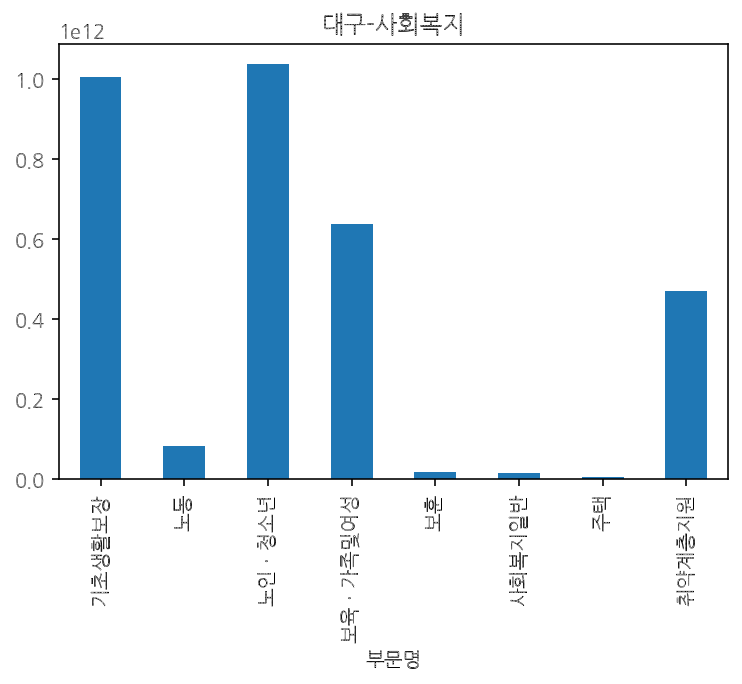

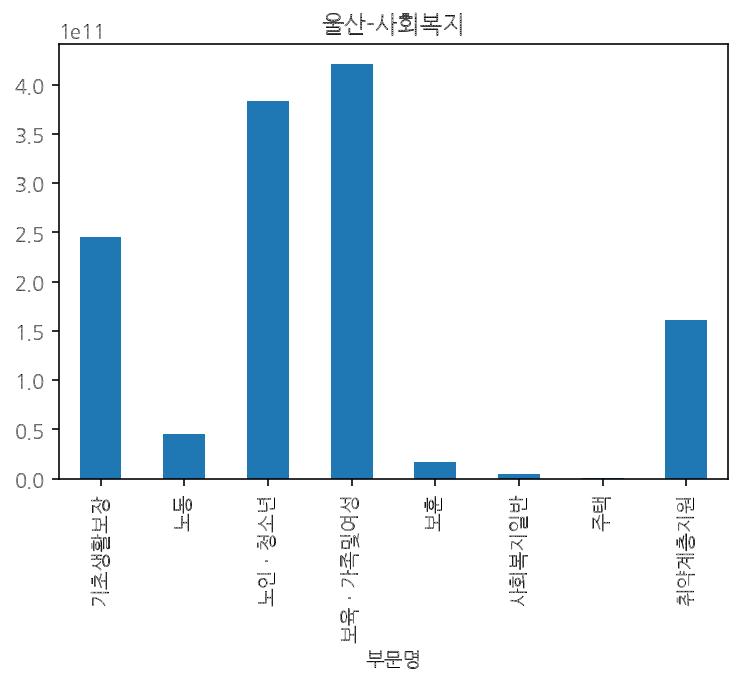

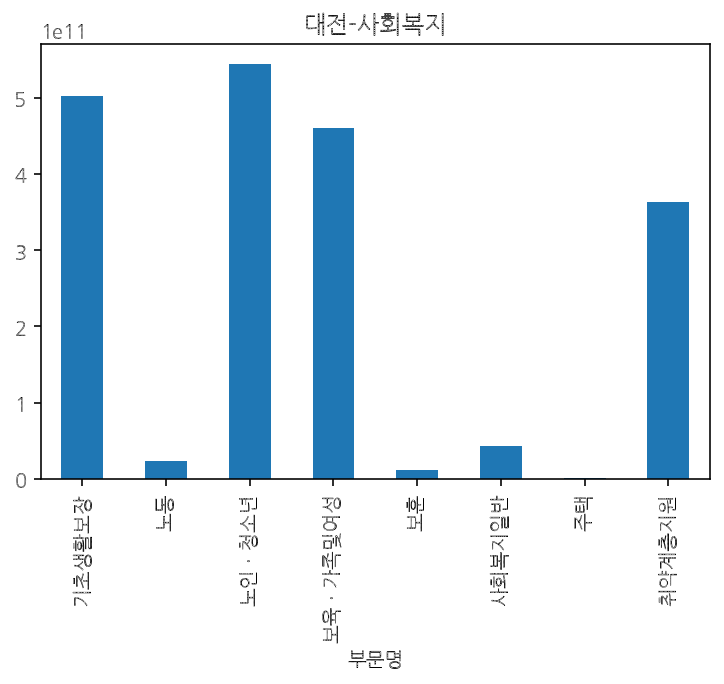

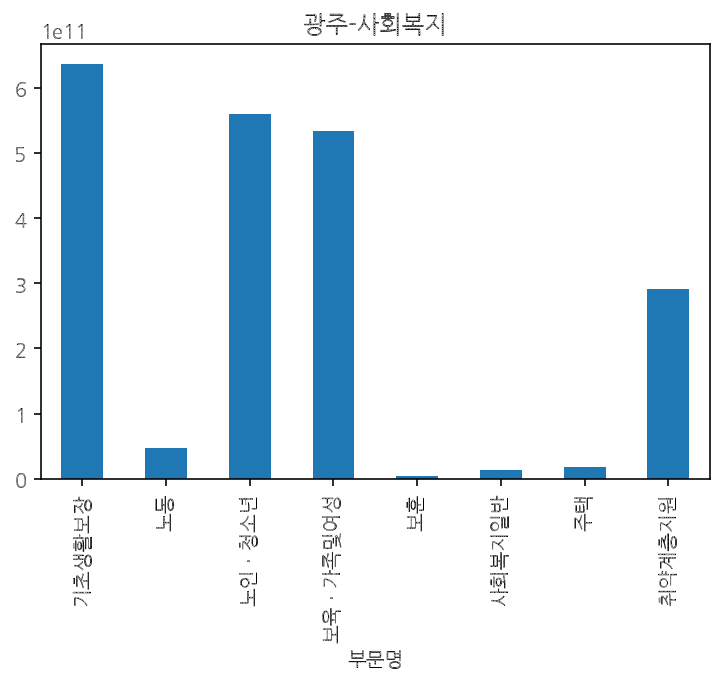

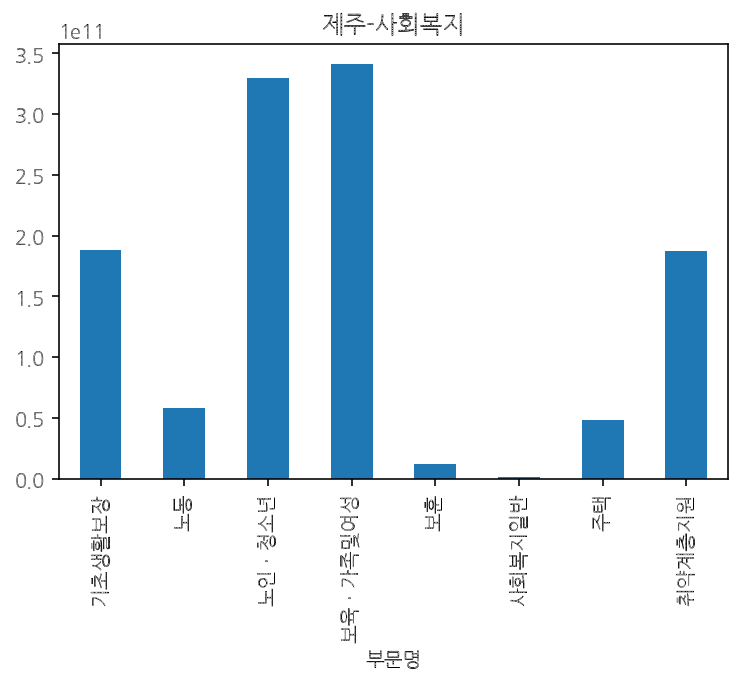

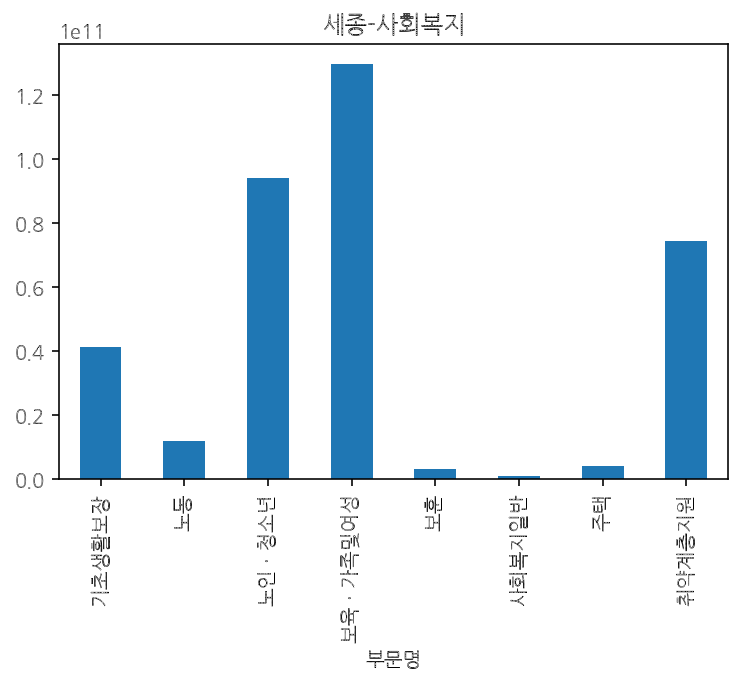

<Figure size 432x288 with 0 Axes>

In [ ]:
# 시각화
for area_name in area_count.index:
  a = df[df['지역명'] == area_name]
  a_sum = a.groupby("분야명").세출결산액.sum()
  field_top = a_sum.sort_values(ascending=False)[0:3].index[0] # 인덱스 조정해서 원하는 순위 뽑으면 될 듯
  b = a[a['분야명'] == field_top]
  b_sum = b.groupby("부문명").세출결산액.sum()

  if field_top != "기타": # 기타는 하위항목 없어서 안뽑히게.
    plt.title(area_name+"-"+field_top)
    b_sum.plot.bar()
    plt.figure()

3 연도별 차이

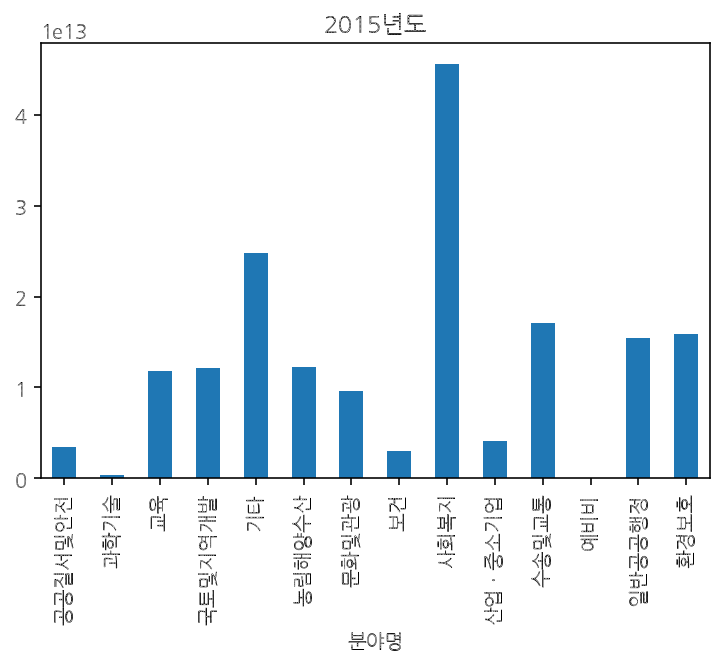

분야명
사회복지     45557415809310
기타       24753307269522
수송및교통    17125115171038
환경보호     15831373133972
Name: 세출결산액, dtype: int64

In [ ]:
# 연도별로 돈 쓰는 분야에 차이가 있는지 보자

# 결산액 바탕으로 분야별 집계 - 2015
df_2015 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/dataset/재정데이터시각화/2015_기능별단체별세출결산.xlsx")
세출결산액_sum_2015 = df_2015.groupby("분야명").세출결산액.sum()
세출결산액_sum_2015.plot.bar()
plt.title("2015년도")
plt.show()

# 세금 많이 쓴 분야 top4
df_2015.groupby("분야명").세출결산액.sum().sort_values(ascending=False)[:4]

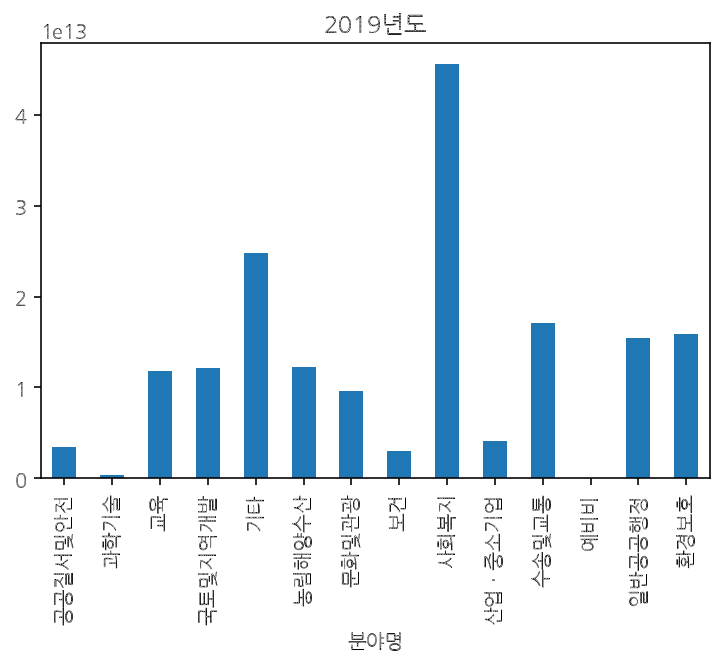

분야명
사회복지     70048139744828
기타       31557914849983
수송및교통    22690248440514
환경보호     22095878885670
Name: 세출결산액, dtype: int64

In [ ]:
# 결산액 바탕으로 분야별 집계 - 2019
df_2019 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/dataset/재정데이터시각화/2019_기능별단체별세출결산.xlsx")
세출결산액_sum_2019 = df_2015.groupby("분야명").세출결산액.sum()
세출결산액_sum_2019.plot.bar()
plt.title("2019년도")
plt.show()

# 세금 많이 쓴 분야 top4
df_2019.groupby("분야명").세출결산액.sum().sort_values(ascending=False)[:4]

In [ ]:
df_2017 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/dataset/재정데이터시각화/2017_기능별단체별세출결산.xlsx")

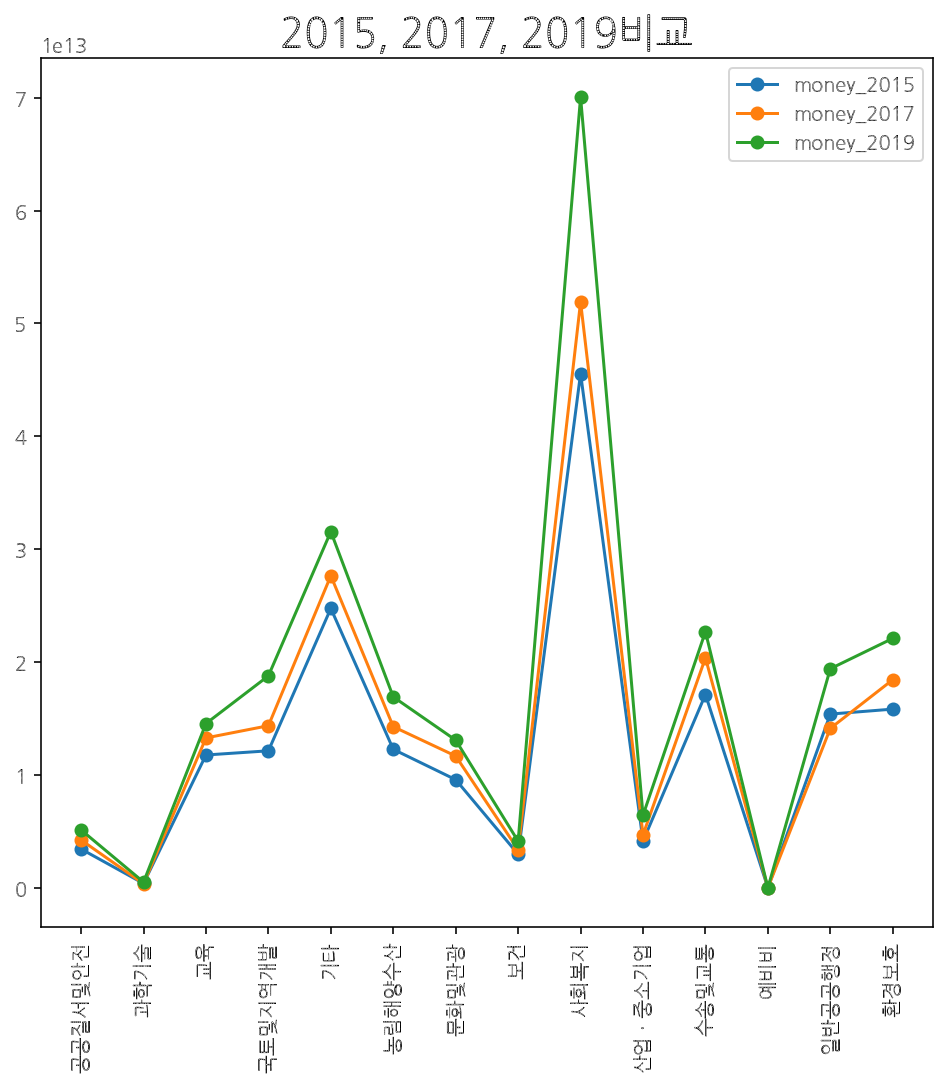

In [ ]:
# 순위는 비슷 ㅜ 값에 차이가 있는지 시계열 그래프?처럼 생긴걸로 합쳐서 보자.
money_2019 = df_2019.groupby("분야명").세출결산액.sum()
money_2017 = df_2017.groupby("분야명").세출결산액.sum()
money_2015 = df_2015.groupby("분야명").세출결산액.sum()

money_2019 = list(money_2019)
money_2017 = list(money_2017)
money_2015 = list(money_2015)
field_name_sort = list(field_count.index)
field_name_sort.sort()

fig = plt.figure(figsize=(8,8)) # 캔버스 생성
fig.set_facecolor('white') # 캔버스 색상 설정
ax = fig.add_subplot() # 그림 뼈대(프레임) 생성

ax.plot(field_name_sort,money_2015,marker='o',label='money_2015') # 선그래프 생성
ax.plot(field_name_sort,money_2017,marker='o',label='money_2017') 
ax.plot(field_name_sort,money_2019,marker='o',label='money_2019') 
ax.legend()
plt.title('2015, 2017, 2019비교',fontsize=20) ## 타이틀 설정
plt.xticks(rotation=90)
plt.show()

4. 사회복지

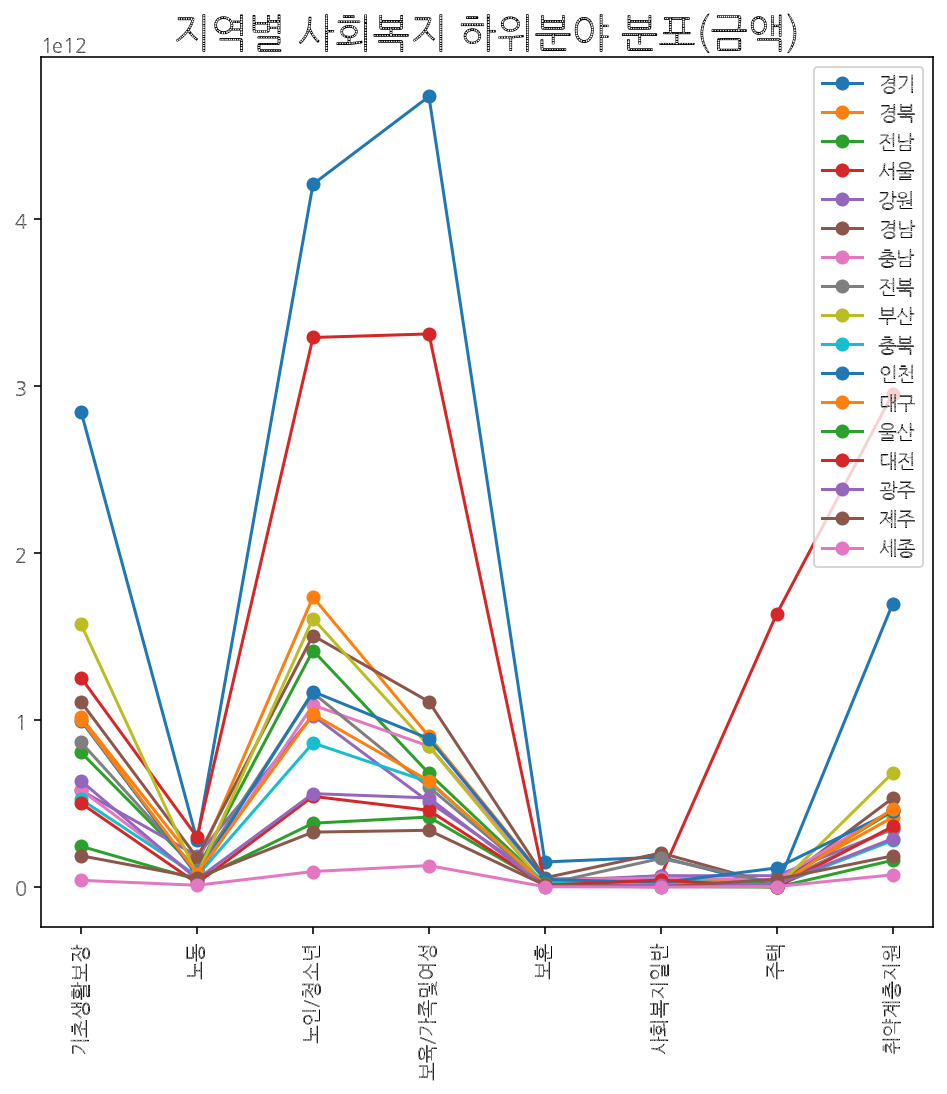

In [ ]:
# 지역별 사회복지 쓴 분야 시각화 - 금액기반

fig = plt.figure(figsize=(8,8)) # 캔버스 생성
fig.set_facecolor('white') # 캔버스 색상 설정
ax = fig.add_subplot() # 그림 뼈대(프레임) 생성
social_walfare = ['기초생활보장', '노동', '노인/청소년', '보육/가족및여성', '보훈', '사회복지일반', '주택', '취약계층지원']

for area_name in area_count.index:
  a = df[df['지역명'] == area_name]
  a_sum = a.groupby("분야명").세출결산액.sum()
  field_top = a_sum.sort_values(ascending=False)[0:3].index[0] # 인덱스 조정해서 원하는 순위 뽑으면 될 듯 -> 사회
  b = a[a['분야명'] == field_top]
  b_sum = b.groupby("부문명").세출결산액.sum()
  list(b_sum)
  ax.plot(social_walfare, b_sum, marker='o',label=area_name) # 선그래프 생성

ax.legend()
plt.title('지역별 사회복지 하위분야 분포(금액)',fontsize=20) ## 타이틀 설정
plt.xticks(rotation=90)
plt.show()

# 경남-사회복지일반 높은거 주목할만함. 
# 근데 원래 돈차이가 나는데 ... 분야별로 세금을 쓰는 비율을 봐야할까 ? ex. 부산 사회복지에 할당된 세금의 절반을 기초새활보장에 썻네 ? 이런느낌 ...

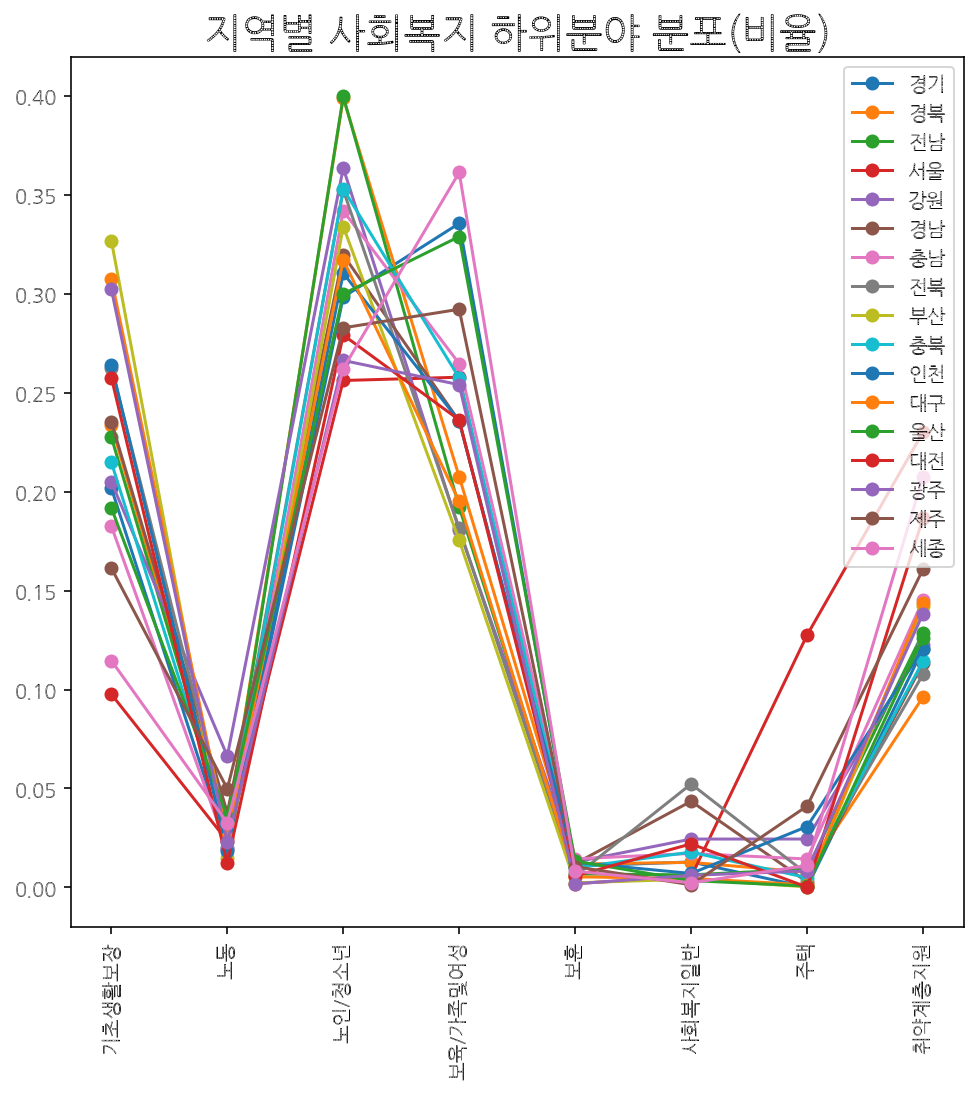

In [ ]:
# 지역별 사회복지 쓴 분야 시각화 -비율에 따라

fig = plt.figure(figsize=(8,8)) # 캔버스 생성
fig.set_facecolor('white') # 캔버스 색상 설정
ax = fig.add_subplot() # 그림 뼈대(프레임) 생성
social_walfare = ['기초생활보장', '노동', '노인/청소년', '보육/가족및여성', '보훈', '사회복지일반', '주택', '취약계층지원']

df_pick = df[df.분야명 == "사회복지"] # 사회복지만 뽑기
for area_name in area_count.index:
  a = df_pick[df_pick['지역명'] == area_name]
  total_sum = a.세출결산액.sum()
  a_sum = a.groupby("부문명").세출결산액.sum()
  ratio = list(a_sum/total_sum)

  ax.plot(social_walfare, ratio, marker='o',label=area_name) # 선그래프 생성

ax.legend()
plt.title('지역별 사회복지 하위분야 분포(비율)',fontsize=20) ## 타이틀 설정
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 시각화한거 보기 어려움 
# 부문별로 그 부문에 세금 쓴 비율 가장 높은 지역 top3 뽑아보자.

df_pick = df[df.분야명 == "사회복지"] # 사회복지만 뽑기
df_pick = df_pick[["지역명", "부문명", "세출결산액"]]

for area_name in area_count.index:
  a = df_pick[df_pick["지역명"] == area_name]
  social_walfare = pd.DataFrame(a.groupby("부문명").세출결산액.sum())
  social_walfare["ratio"] = social_walfare["세출결산액"]/social_walfare.세출결산액.sum()
  print("==============={}=================".format(area_name))
  print(social_walfare.sort_values(by=['ratio'], ascending=False)[:3])

#a = df[df_pick["지역명"] == "서울"]
#seoul_social_walfare = pd.DataFrame(a.groupby("분야명").세출결산액.sum())
#seoul_social_walfare["ratio"] = seoul_social_walfare["세출결산액"]/seoul_social_walfare.세출결산액.sum()
#seoul_social_walfare.sort_values(by=['ratio'], ascending=False)

===============경기=================
                  세출결산액     ratio
부문명                              
보육ㆍ가족및여성  4736500854148  0.335693
노인ㆍ청소년    4211290392579  0.298470
기초생활보장    2848370485989  0.201875
===============경북=================
                  세출결산액     ratio
부문명                              
노인ㆍ청소년    1737626771775  0.399113
기초생활보장    1017654464868  0.233744
보육ㆍ가족및여성   903909456337  0.207618
===============전남=================
                  세출결산액     ratio
부문명                              
노인ㆍ청소년    1417677497437  0.399864
기초생활보장     806974233120  0.227612
보육ㆍ가족및여성   681523199880  0.192227
===============서울=================
                  세출결산액     ratio
부문명                              
보육ㆍ가족및여성  3314265056193  0.257917
노인ㆍ청소년    3292946760658  0.256258
취약계층지원    2957084370097  0.230121
===============강원=================
                  세출결산액     ratio
부문명                              
노인ㆍ청소년    1028406047866  0.363709
기초생활보장     579590867581  0.204980
보육ㆍ가족및여성 

5. 지역별 특이점 파악

5-1 사회복지 - 취약계층 비율, 기초생활수급자 수, 인구 연령 비율

In [ ]:
recipient_01 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/dataset/재정데이터시각화/201901.xlsx")

In [ ]:
recipient_01 = pd.DataFrame(recipient_01.groupby("통계시도명").수급자수.sum())

In [ ]:
통계시도명 = list(recipient_01.index)
수급자수 = list(recipient_01.수급자수.values)

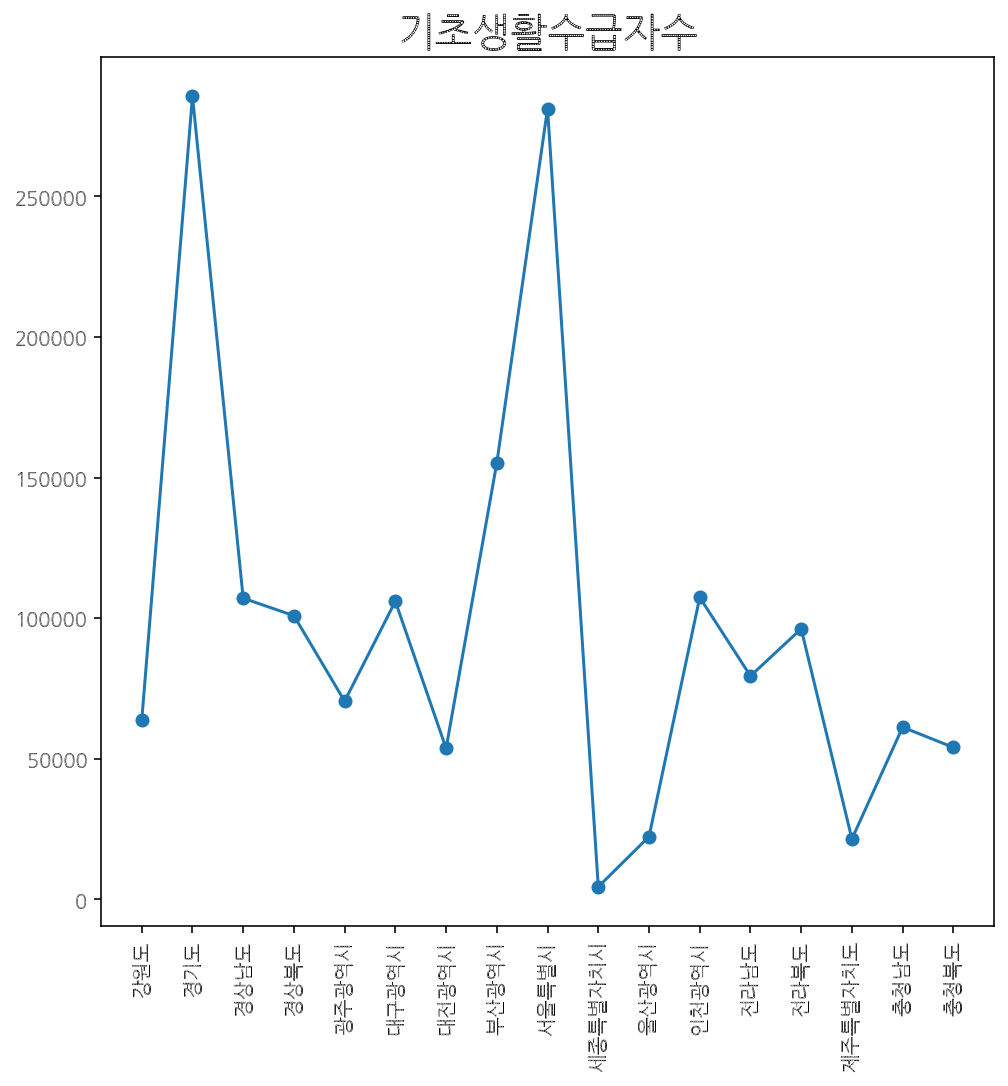

In [ ]:
fig = plt.figure(figsize=(8,8)) # 캔버스 생성
fig.set_facecolor('white') # 캔버스 색상 설정ㅇ
ax = fig.add_subplot() # 그림 뼈대(프레임) 생성

ax.plot(통계시도명, 수급자수, marker='o',label=통계시도명) # 선그래프 생성

plt.title('기초생활수급자수',fontsize=20) # 타이틀 설정
plt.xticks(rotation=90)
plt.show()

5-2 보건 -  병원 수, 의사/간호사 수, 보건소 수, 의료종사자 수